<a href="https://colab.research.google.com/github/saryanian/Numerical-Analysis-Project/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-47-7833d301749b>:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] = fsolve(eqn, y[i-1])


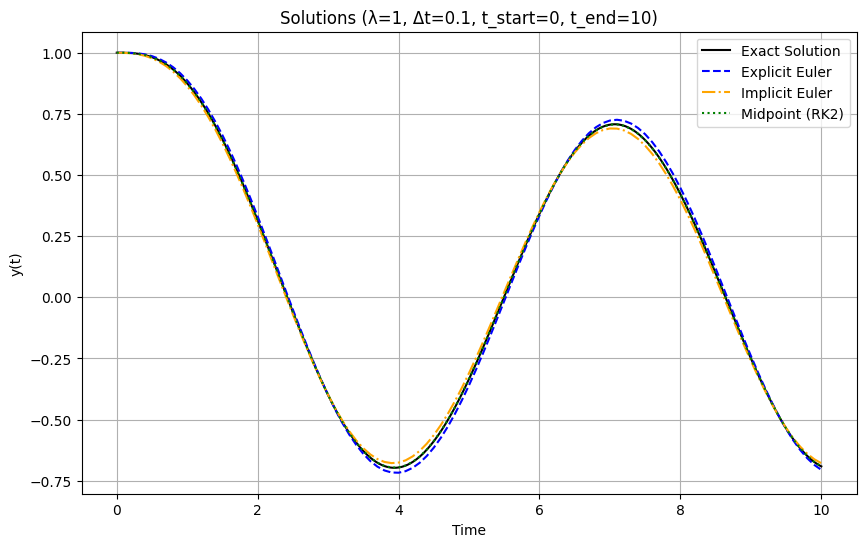

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Exact solution
def Exact_Solution(t, y0, lam):
    C = y0 - lam**2 / (1 + lam**2)
    y = (C * np.exp(-lam * t) +
         (lam**2 / (1 + lam**2)) * np.cos(t) +
         (lam / (1 + lam**2)) * np.sin(t))
    return y

# Differential equation
def dydt(t, y, lam):
    return lam * (-y + np.cos(t))

# Explicit Euler
def Explicit_Euler(t, y0, lam, dydt):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        y[i] = y[i-1] + dt * dydt(t[i-1], y[i-1], lam)
    return y

# Implicit Euler
def Implicit_Euler(t, y0, lam, dydt):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        eqn = lambda y_next: y_next - y[i-1] - dt * dydt(t[i], y_next, lam)
        y[i] = fsolve(eqn, y[i-1])
    return y

# RK2 (Midpoint)
def Runge_Kutta_2(t, y0, lam, dydt):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        k1 = dydt(t[i-1], y[i-1], lam)
        k2 = dydt(t[i-1] + dt / 2, y[i-1] + dt * k1 / 2, lam)
        y[i] = y[i-1] + dt * k2
    return y

# Initial conditions
t_start = 0
t_end = 10
y0 = 1.0
dt = 0.1
lam = 1

# Time vector and solutions
t = np.arange(t_start, t_end + dt, dt)
t_fine = np.linspace(t_start, t_end, 1000)
y_Exact_Solution_fine = Exact_Solution(t_fine, y0, lam)

y_Exact_Solution = Exact_Solution(t, y0, lam)
y_Explicit_Euler = Explicit_Euler(t, y0, lam, dydt)
y_Implicit_Euler = Implicit_Euler(t, y0, lam, dydt)
y_Runge_Kutta_2 = Runge_Kutta_2(t, y0, lam, dydt)

# Plot solutions
plt.figure(figsize=(10, 6))
plt.plot(t_fine, y_Exact_Solution_fine, label="Exact Solution", linestyle="-", color="black")
plt.plot(t, y_Explicit_Euler, label="Explicit Euler", linestyle="--", color="blue")
plt.plot(t, y_Implicit_Euler, label="Implicit Euler", linestyle="-.", color="orange")
plt.plot(t, y_Runge_Kutta_2, label="Midpoint (RK2)", linestyle=":", color="green")
plt.xlabel("Time")
plt.ylabel("y(t)")
plt.title(f"Solutions (λ={lam}, Δt={dt}, t_start={t_start}, t_end={t_end})")
plt.legend()
plt.grid()
plt.show()

<ipython-input-1-9a11638ced29>:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] = fsolve(eqn, y[i-1])


Max Error (Explicit Euler): 0.026662
Max Error (Implicit Euler): 0.025510
Max Error (RK2): 0.000727


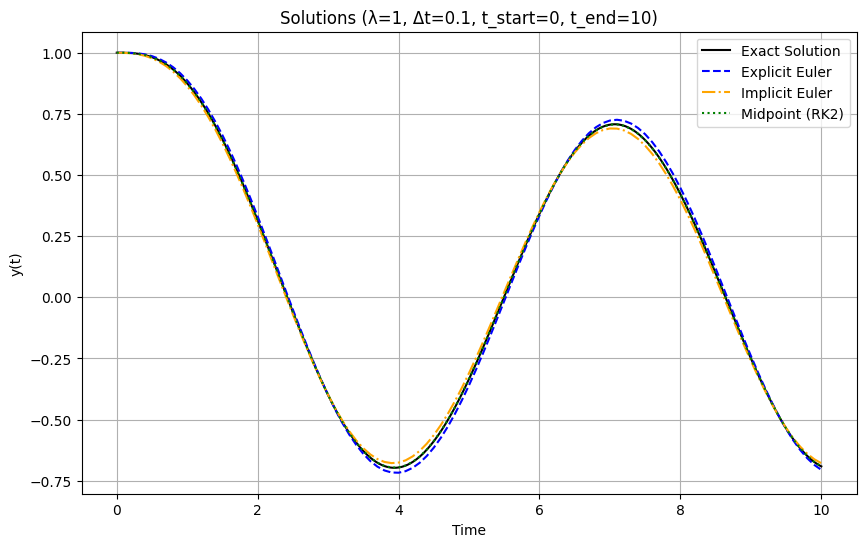

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Exact solution
def Exact_Solution(t, y0, lam):
    C = y0 - lam**2 / (1 + lam**2)
    y = (C * np.exp(-lam * t) +
         (lam**2 / (1 + lam**2)) * np.cos(t) +
         (lam / (1 + lam**2)) * np.sin(t))
    return y

# Differential equation
def dydt(t, y, lam):
    return lam * (-y + np.cos(t))

# Explicit Euler
def Explicit_Euler(t, y0, lam, dydt):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        y[i] = y[i-1] + dt * dydt(t[i-1], y[i-1], lam)
    return y

# Implicit Euler
def Implicit_Euler(t, y0, lam, dydt):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        eqn = lambda y_next: y_next - y[i-1] - dt * dydt(t[i], y_next, lam)
        y[i] = fsolve(eqn, y[i-1])
    return y

# RK2 (Midpoint)
def Runge_Kutta_2(t, y0, lam, dydt):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        k1 = dydt(t[i-1], y[i-1], lam)
        k2 = dydt(t[i-1] + dt / 2, y[i-1] + dt * k1 / 2, lam)
        y[i] = y[i-1] + dt * k2
    return y

# Initial conditions
t_start = 0
t_end = 10
y0 = 1.0
dt = 0.1
lam = 1

# Time vector and solutions
t = np.arange(t_start, t_end + dt, dt)
t_fine = np.linspace(t_start, t_end, 1000)
y_Exact_Solution_fine = Exact_Solution(t_fine, y0, lam)

y_Exact_Solution = Exact_Solution(t, y0, lam)
y_Explicit_Euler = Explicit_Euler(t, y0, lam, dydt)
y_Implicit_Euler = Implicit_Euler(t, y0, lam, dydt)
y_Runge_Kutta_2 = Runge_Kutta_2(t, y0, lam, dydt)

# Calculate Errors
error_Explicit_Euler = np.max(np.abs(y_Exact_Solution - y_Explicit_Euler))
error_Implicit_Euler = np.max(np.abs(y_Exact_Solution - y_Implicit_Euler))
error_Runge_Kutta_2 = np.max(np.abs(y_Exact_Solution - y_Runge_Kutta_2))

print(f"Max Error (Explicit Euler): {error_Explicit_Euler:.6f}")
print(f"Max Error (Implicit Euler): {error_Implicit_Euler:.6f}")
print(f"Max Error (RK2): {error_Runge_Kutta_2:.6f}")

# Plot solutions
plt.figure(figsize=(10, 6))
plt.plot(t_fine, y_Exact_Solution_fine, label="Exact Solution", linestyle="-", color="black")
plt.plot(t, y_Explicit_Euler, label="Explicit Euler", linestyle="--", color="blue")
plt.plot(t, y_Implicit_Euler, label="Implicit Euler", linestyle="-.", color="orange")
plt.plot(t, y_Runge_Kutta_2, label="Midpoint (RK2)", linestyle=":", color="green")
plt.xlabel("Time")
plt.ylabel("y(t)")
plt.title(f"Solutions (λ={lam}, Δt={dt}, t_start={t_start}, t_end={t_end})")
plt.legend()
plt.grid()
plt.show()

<ipython-input-3-153c220adefb>:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] = fsolve(eqn, y[i-1])


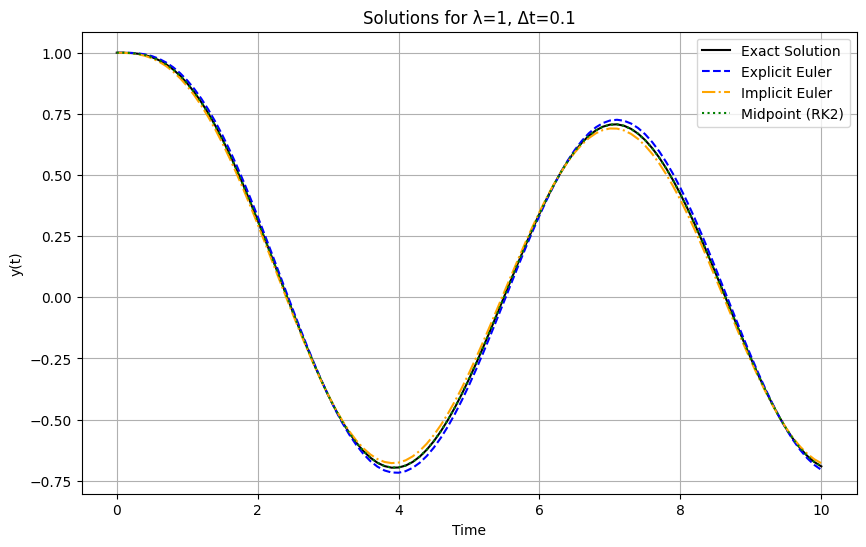

Δt = 0.1
  Max Error (Explicit Euler): 0.026662
  Max Error (Implicit Euler): 0.025510
  Max Error (RK2): 0.000727


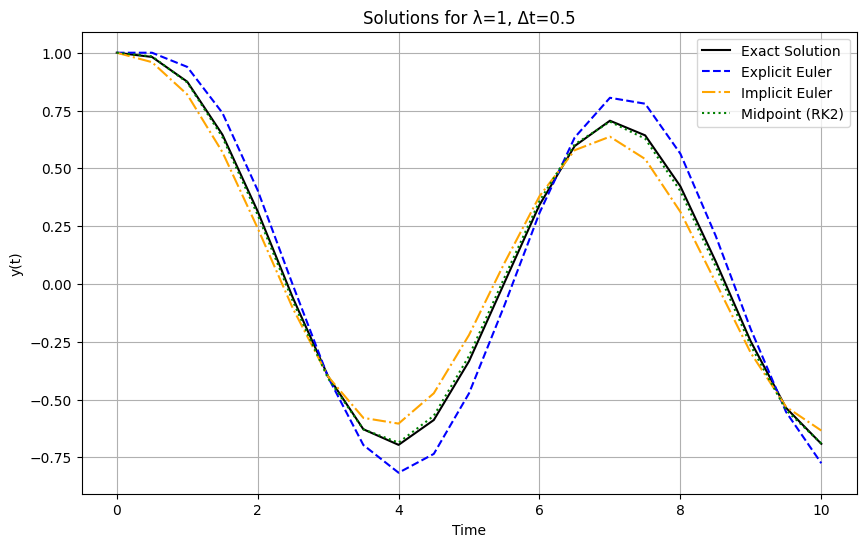

Δt = 0.5
  Max Error (Explicit Euler): 0.146492
  Max Error (Implicit Euler): 0.115598
  Max Error (RK2): 0.022971


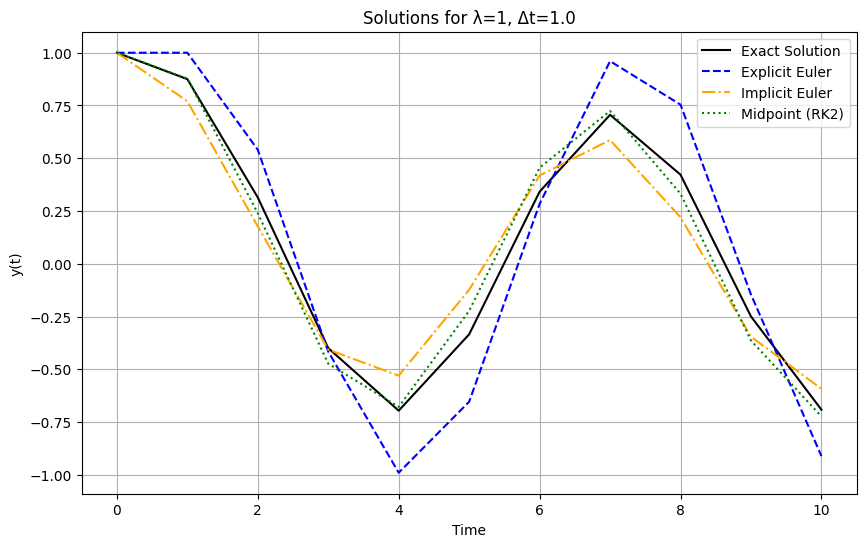

Δt = 1.0
  Max Error (Explicit Euler): 0.331805
  Max Error (Implicit Euler): 0.211058
  Max Error (RK2): 0.113936


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Exact solution
def Exact_Solution(t, y0, lam):
    C = y0 - lam**2 / (1 + lam**2)
    y = (C * np.exp(-lam * t) +
         (lam**2 / (1 + lam**2)) * np.cos(t) +
         (lam / (1 + lam**2)) * np.sin(t))
    return y

# Differential equation
def dydt(t, y, lam):
    return lam * (-y + np.cos(t))

# Explicit Euler
def Explicit_Euler(t, y0, lam, dydt):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        y[i] = y[i-1] + dt * dydt(t[i-1], y[i-1], lam)
    return y

# Implicit Euler
def Implicit_Euler(t, y0, lam, dydt):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        eqn = lambda y_next: y_next - y[i-1] - dt * dydt(t[i], y_next, lam)
        y[i] = fsolve(eqn, y[i-1])
    return y

# RK2 (Midpoint)
def Runge_Kutta_2(t, y0, lam, dydt):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        k1 = dydt(t[i-1], y[i-1], lam)
        k2 = dydt(t[i-1] + dt / 2, y[i-1] + dt * k1 / 2, lam)
        y[i] = y[i-1] + dt * k2
    return y

# Parameters
t_start = 0
t_end = 10
y0 = 1.0
lam = 1

# Test different time steps
time_steps = [0.1, 0.5, 1.0]

for dt in time_steps:
    t = np.arange(t_start, t_end + dt, dt)
    y_Exact_Solution = Exact_Solution(t, y0, lam)
    y_Explicit_Euler = Explicit_Euler(t, y0, lam, dydt)
    y_Implicit_Euler = Implicit_Euler(t, y0, lam, dydt)
    y_Runge_Kutta_2 = Runge_Kutta_2(t, y0, lam, dydt)

    # Plot solutions
    plt.figure(figsize=(10, 6))
    plt.plot(t, y_Exact_Solution, label="Exact Solution", linestyle="-", color="black")
    plt.plot(t, y_Explicit_Euler, label="Explicit Euler", linestyle="--", color="blue")
    plt.plot(t, y_Implicit_Euler, label="Implicit Euler", linestyle="-.", color="orange")
    plt.plot(t, y_Runge_Kutta_2, label="Midpoint (RK2)", linestyle=":", color="green")
    plt.xlabel("Time")
    plt.ylabel("y(t)")
    plt.title(f"Solutions for λ={lam}, Δt={dt}")
    plt.legend()
    plt.grid()
    plt.show()

    # Compute Errors
    error_Explicit_Euler = np.max(np.abs(y_Exact_Solution - y_Explicit_Euler))
    error_Implicit_Euler = np.max(np.abs(y_Exact_Solution - y_Implicit_Euler))
    error_Runge_Kutta_2 = np.max(np.abs(y_Exact_Solution - y_Runge_Kutta_2))

    print(f"Δt = {dt}")
    print(f"  Max Error (Explicit Euler): {error_Explicit_Euler:.6f}")
    print(f"  Max Error (Implicit Euler): {error_Implicit_Euler:.6f}")
    print(f"  Max Error (RK2): {error_Runge_Kutta_2:.6f}")

<ipython-input-42-ff3431f40128>:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] = fsolve(eqn, y[i-1])
<ipython-input-42-ff3431f40128>:33: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  y[i] = fsolve(eqn, y[i-1])


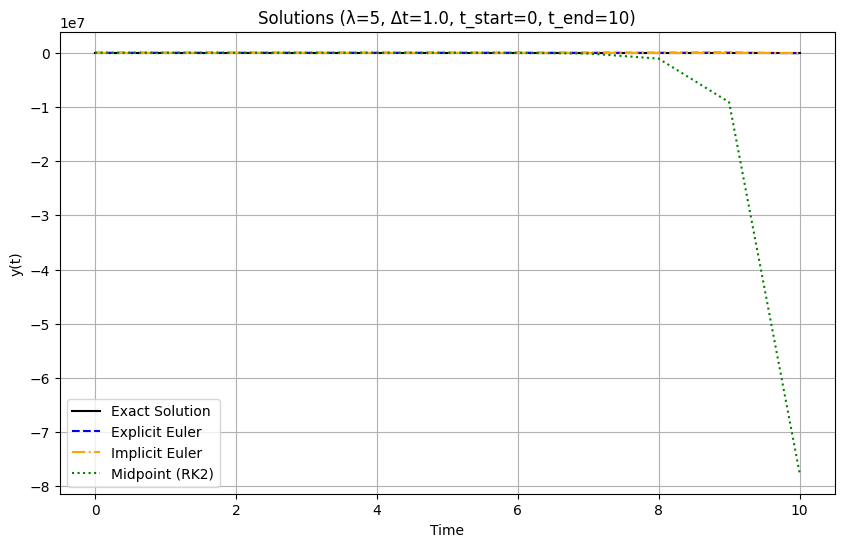

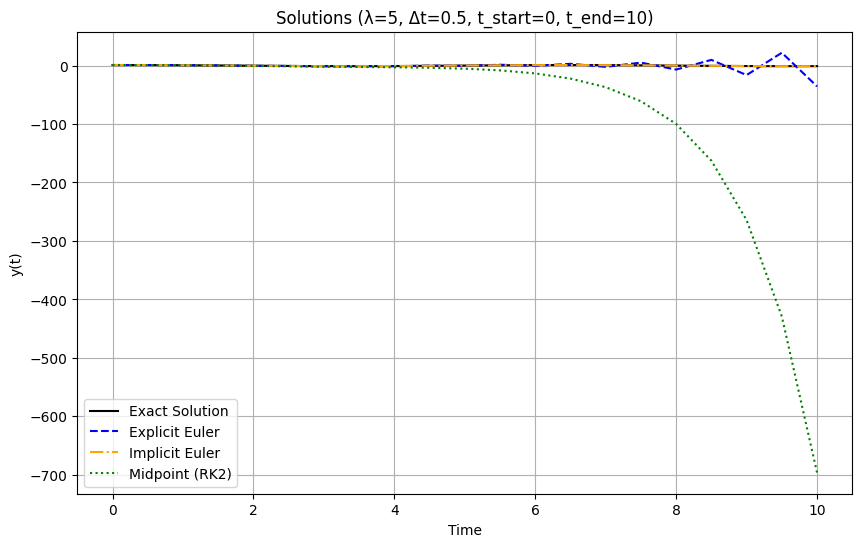

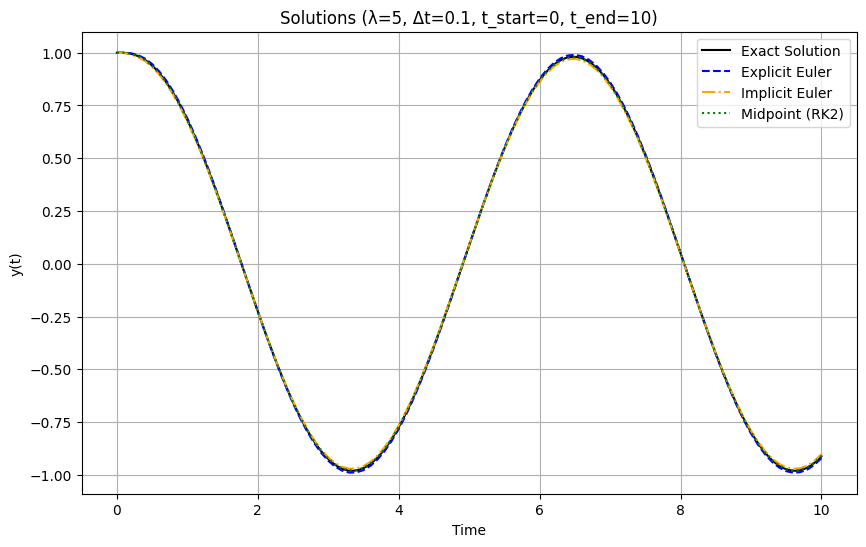

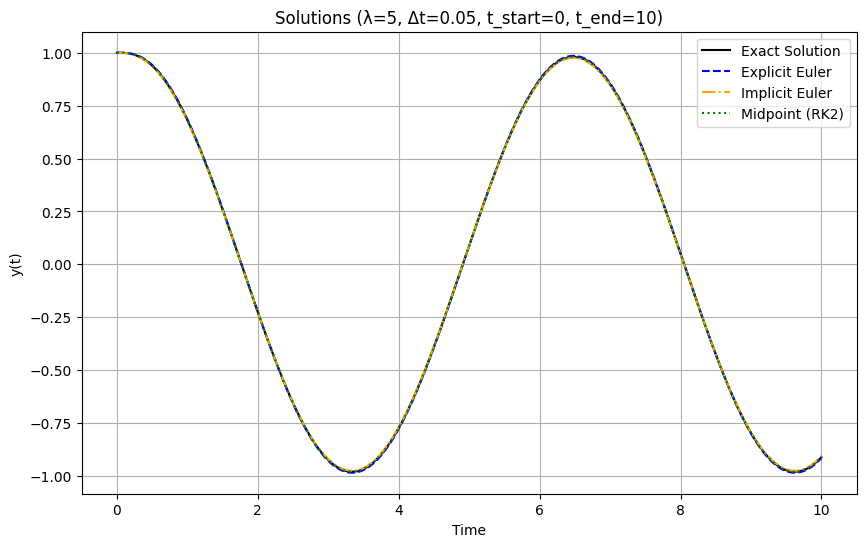

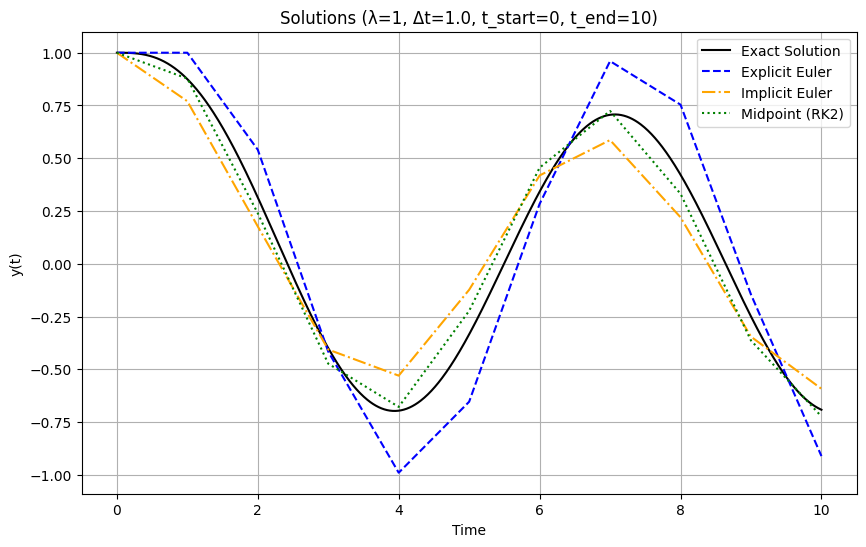

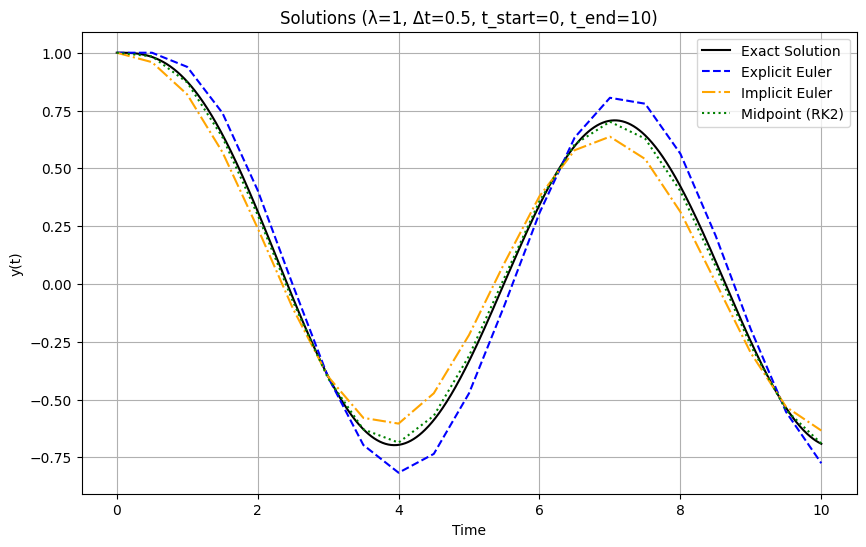

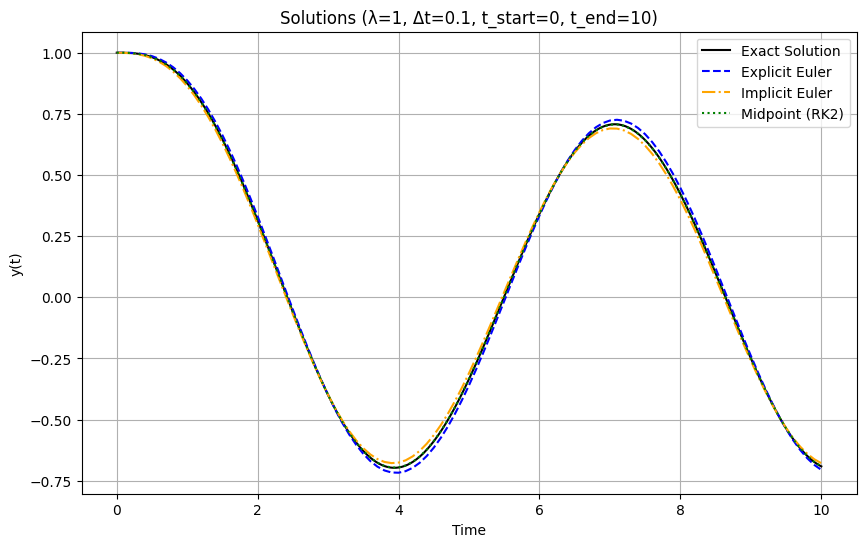

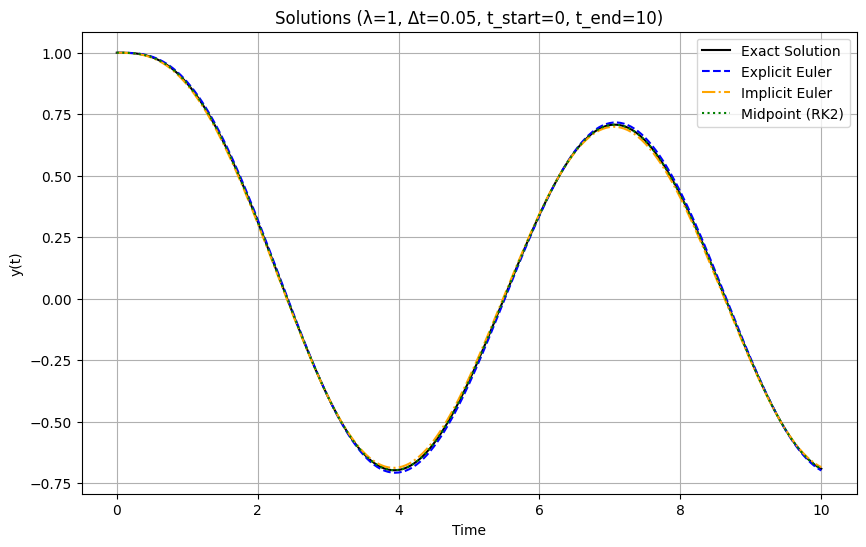

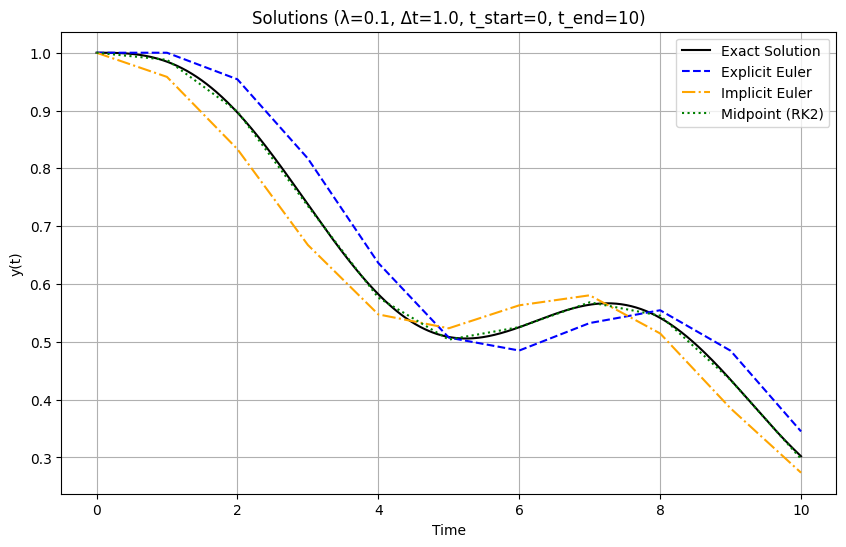

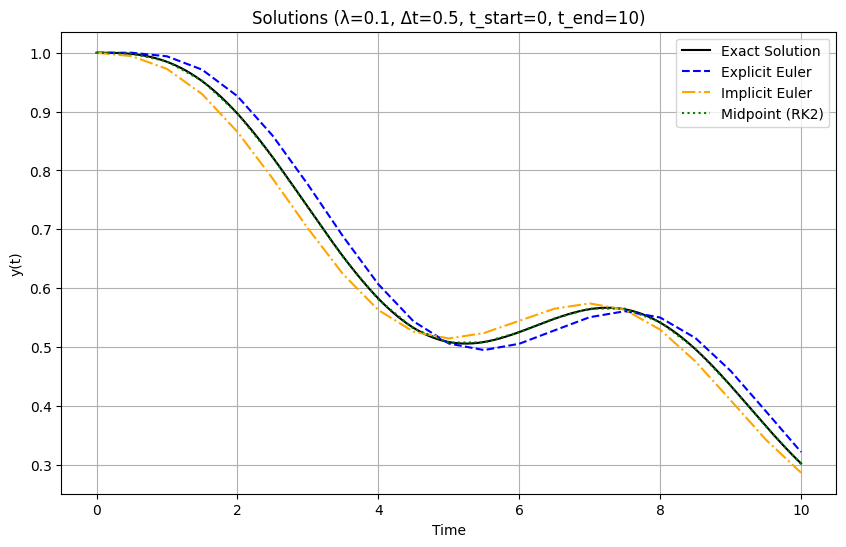

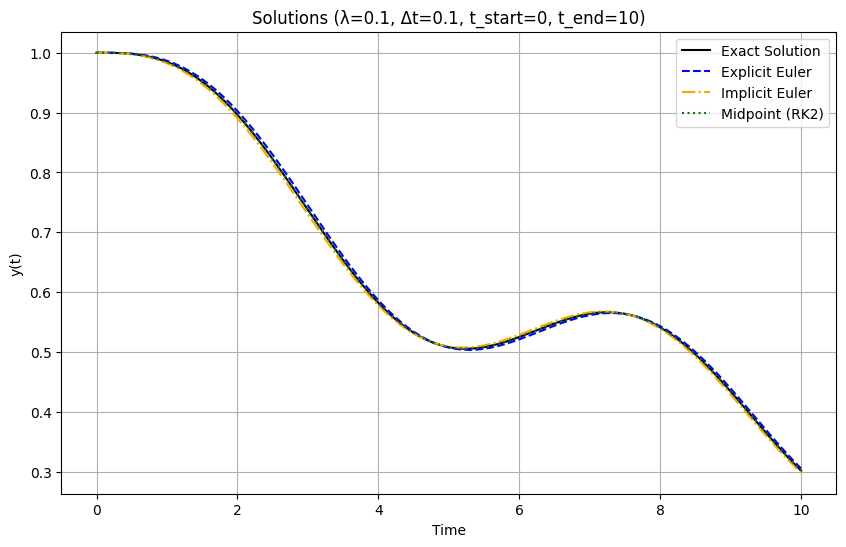

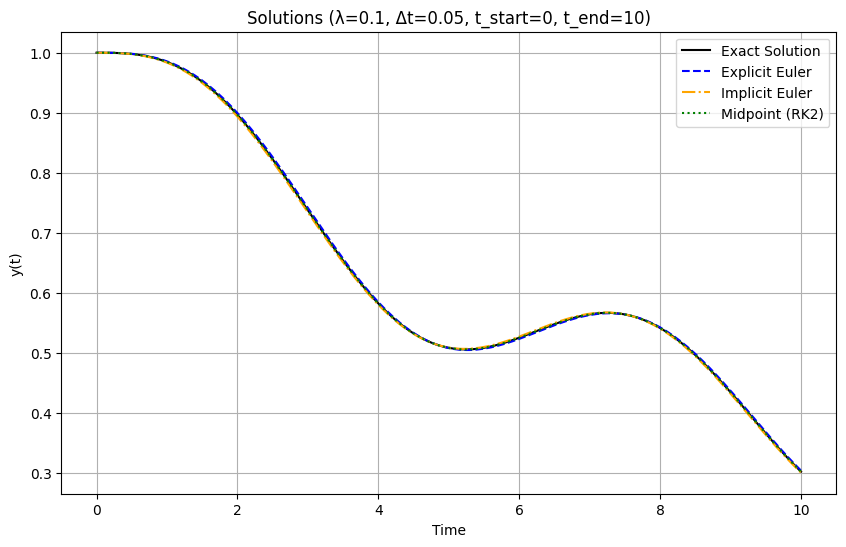

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Exact solution
def Exact_Solution(t, y0, lam):
    C = y0 - lam**2 / (1 + lam**2)
    y = (C * np.exp(-lam * t) +
         (lam**2 / (1 + lam**2)) * np.cos(t) +
         (lam / (1 + lam**2)) * np.sin(t))
    return y

# Differential equation
def dydt(t, y, lam):
    return lam * (-y + np.cos(t))

# Explicit Euler
def Explicit_Euler(t, y0, lam, dydt):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        y[i] = y[i-1] + dt * dydt(t[i-1], y[i-1], lam)
    return y

# Implicit Euler
def Implicit_Euler(t, y0, lam, dydt):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        eqn = lambda y_next: y_next - y[i-1] - dt * dydt(t[i], y_next, lam)
        y[i] = fsolve(eqn, y[i-1])
    return y

# RK2 (Midpoint)
def Runge_Kutta_2(t, y0, lam, dydt):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        k1 = dydt(t[i-1], y[i-1], lam)
        k2 = dydt(t[i-1] + dt / 2, y[i-1] + dt * k1 / 2, lam)
        y[i] = y[i-1] + dt * k2
    return y

# Initial conditions
t_start = 0
t_end = 10
y0 = 1.0

lambdas = [5,1, 0.1 ]
h = [1.0, 0.5, 0.1, 0.05]

# Adjusting the loop order: iterate over lambda first, then over dt
for lam in lambdas:
    for dt in h:
        t = np.arange(t_start, t_end + dt, dt)
        t_fine = np.linspace(t_start, t_end, 1000)
        y_Exact_Solution_fine = Exact_Solution(t_fine, y0, lam)

        y_Exact_Solution = Exact_Solution(t, y0, lam)
        y_Explicit_Euler = Explicit_Euler(t, y0, lam, dydt)
        y_Implicit_Euler = Implicit_Euler(t, y0, lam, dydt)
        y_Runge_Kutta_2 = Runge_Kutta_2(t, y0, lam, dydt)

        # Plot solutions
        plt.figure(figsize=(10, 6))
        plt.plot(t_fine, y_Exact_Solution_fine, label="Exact Solution", linestyle="-", color="black")
        plt.plot(t, y_Explicit_Euler, label="Explicit Euler", linestyle="--", color="blue")
        plt.plot(t, y_Implicit_Euler, label="Implicit Euler", linestyle="-.", color="orange")
        plt.plot(t, y_Runge_Kutta_2, label="Midpoint (RK2)", linestyle=":", color="green")
        plt.xlabel("Time")
        plt.ylabel("y(t)")
        plt.title(f"Solutions (λ={lam}, Δt={dt}, t_start={t_start}, t_end={t_end})")
        plt.legend()
        plt.grid()
        plt.show()

<ipython-input-60-3464924ecb61>:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] = fsolve(eqn, y[i-1])


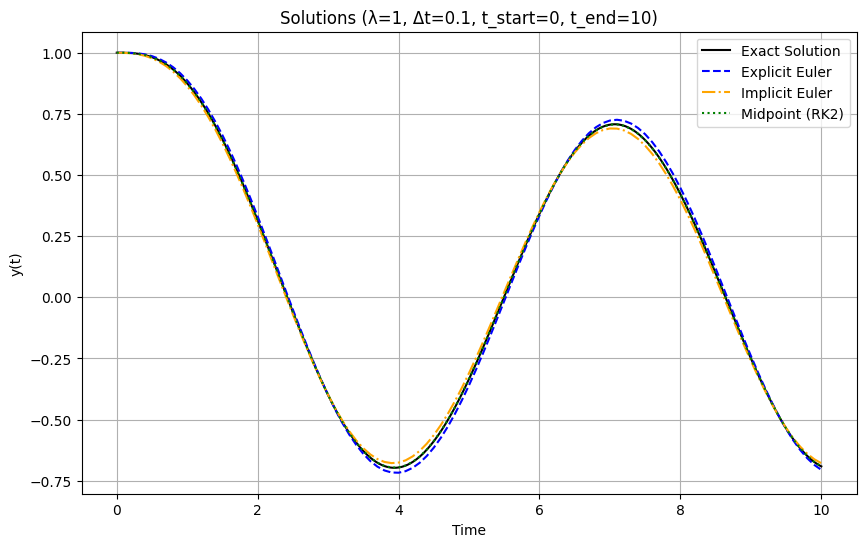

Max Error (Explicit Euler) : 0.02666157042453754
Max Error (Implicit Euler) : 0.025510118790537717
Max Error (Runge Kutta 2)  : 0.0007272324816545717


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Exact solution
def Exact_Solution(t, y0, lam):
    C = y0 - lam**2 / (1 + lam**2)
    y = (C * np.exp(-lam * t) +
         (lam**2 / (1 + lam**2)) * np.cos(t) +
         (lam / (1 + lam**2)) * np.sin(t))
    return y

# Differential equation
def dydt(t, y, lam):
    return lam * (-y + np.cos(t))

# Explicit Euler
def Explicit_Euler(t, y0, lam, dydt):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        y[i] = y[i-1] + dt * dydt(t[i-1], y[i-1], lam)
    return y

# Implicit Euler
def Implicit_Euler(t, y0, lam, dydt):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        eqn = lambda y_next: y_next - y[i-1] - dt * dydt(t[i], y_next, lam)
        y[i] = fsolve(eqn, y[i-1])
    return y

# RK2 (Midpoint)
def Runge_Kutta_2(t, y0, lam, dydt):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        k1 = dydt(t[i-1], y[i-1], lam)
        k2 = dydt(t[i-1] + dt / 2, y[i-1] + dt * k1 / 2, lam)
        y[i] = y[i-1] + dt * k2
    return y

# Initial conditions
t_start = 0
t_end = 10
y0 = 1.0
dt = 0.1
lam = 1

# Time vector and solutions
t = np.arange(t_start, t_end + dt, dt)
t_fine = np.linspace(t_start, t_end, 1000)
y_Exact_Solution_fine = Exact_Solution(t_fine, y0, lam)

y_Exact_Solution = Exact_Solution(t, y0, lam)
y_Explicit_Euler = Explicit_Euler(t, y0, lam, dydt)
y_Implicit_Euler = Implicit_Euler(t, y0, lam, dydt)
y_Runge_Kutta_2 = Runge_Kutta_2(t, y0, lam, dydt)

# Plot solutions
plt.figure(figsize=(10, 6))
plt.plot(t_fine, y_Exact_Solution_fine, label="Exact Solution", linestyle="-", color="black")
plt.plot(t, y_Explicit_Euler, label="Explicit Euler", linestyle="--", color="blue")
plt.plot(t, y_Implicit_Euler, label="Implicit Euler", linestyle="-.", color="orange")
plt.plot(t, y_Runge_Kutta_2, label="Midpoint (RK2)", linestyle=":", color="green")
plt.xlabel("Time")
plt.ylabel("y(t)")
plt.title(f"Solutions (λ={lam}, Δt={dt}, t_start={t_start}, t_end={t_end})")
plt.legend()
plt.grid()
plt.show()


# Compute errors
error_explicit_euler = np.abs(y_Explicit_Euler - y_Exact_Solution)
error_implicit_euler = np.abs(y_Implicit_Euler - y_Exact_Solution)
error_Runge_Kutta_2  = np.abs(y_Runge_Kutta_2  - y_Exact_Solution)

# Print max errors
print(f"Max Error (Explicit Euler) : {np.max(error_explicit_euler)}")
print(f"Max Error (Implicit Euler) : {np.max(error_implicit_euler)}")
print(f"Max Error (Runge Kutta 2)  : {np.max(error_Runge_Kutta_2)}" )

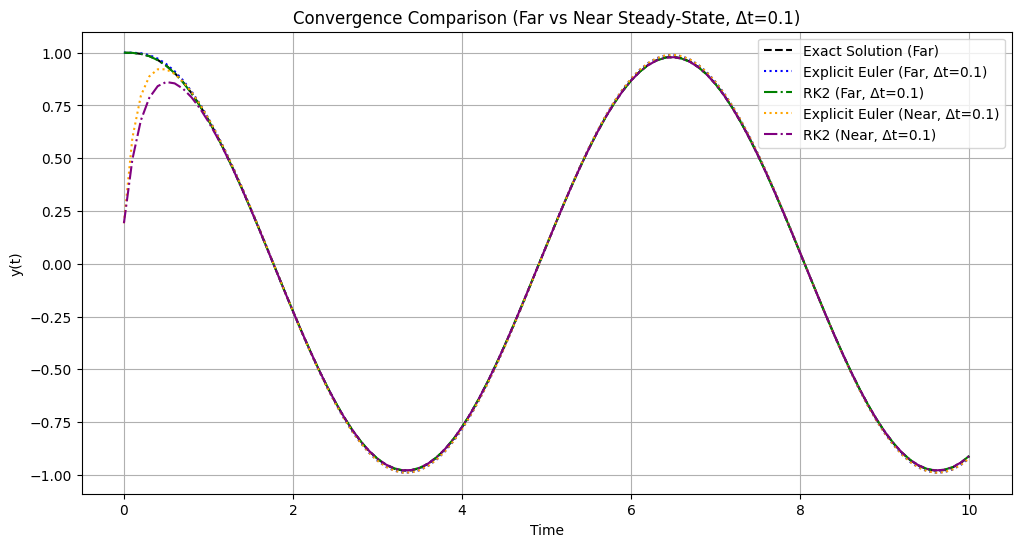

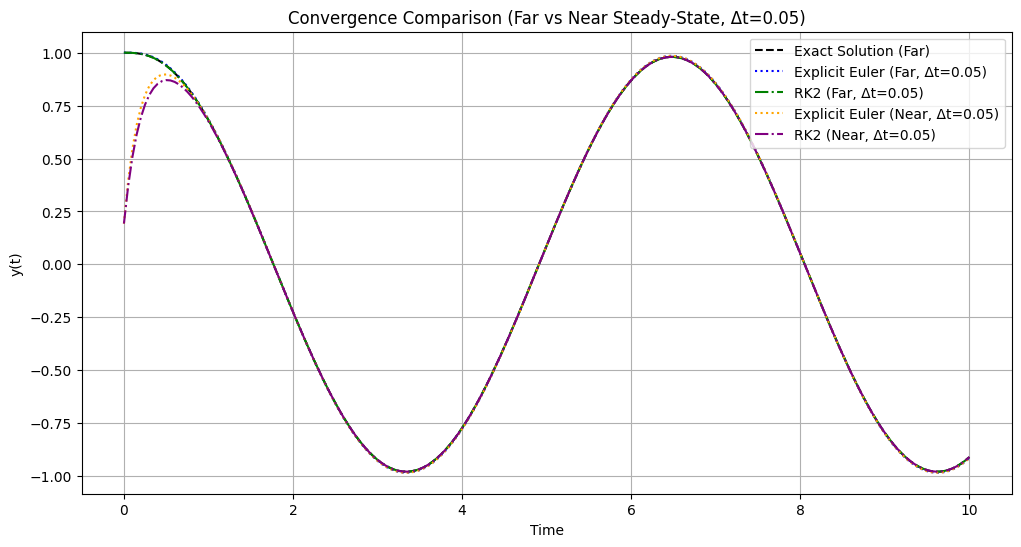

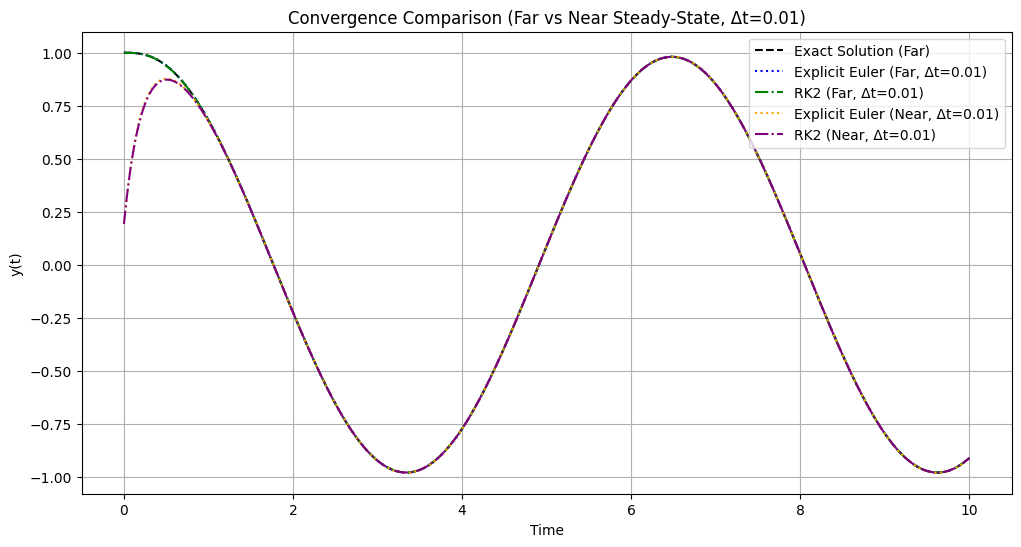

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Exact solution
def Exact_Solution(t, y0, lam):
    C = y0 - lam**2 / (1 + lam**2)
    y = (C * np.exp(-lam * t) +
         (lam**2 / (1 + lam**2)) * np.cos(t) +
         (lam / (1 + lam**2)) * np.sin(t))
    return y

# Differential equation
def dydt(t, y, lam):
    return lam * (-y + np.cos(t))

# Explicit Euler
def Explicit_Euler(t, y0, lam, dydt):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        y[i] = y[i-1] + dt * dydt(t[i-1], y[i-1], lam)
    return y

# RK2 (Midpoint)
def Runge_Kutta_2(t, y0, lam, dydt):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        k1 = dydt(t[i-1], y[i-1], lam)
        k2 = dydt(t[i-1] + dt / 2, y[i-1] + dt * k1 / 2, lam)
        y[i] = y[i-1] + dt * k2
    return y

# Parameters
t_start = 0
t_end = 10
lam = 5  # Large lambda to emphasize fast dynamics
time_steps = [0.1, 0.05, 0.01]

# Case 1: Start near steady state
y0_near = lam / (1 + lam**2)

# Case 2: Start far from steady state
y0_far = 1.0

# Run simulations for each case and compare
for dt in time_steps:
    t = np.arange(t_start, t_end + dt, dt)

    # Exact solution
    y_exact = Exact_Solution(t, y0_far, lam)

    # Explicit Euler
    y_euler_far = Explicit_Euler(t, y0_far, lam, dydt)
    y_euler_near = Explicit_Euler(t, y0_near, lam, dydt)

    # RK2 (Midpoint)
    y_rk2_far = Runge_Kutta_2(t, y0_far, lam, dydt)
    y_rk2_near = Runge_Kutta_2(t, y0_near, lam, dydt)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(t, y_exact, label="Exact Solution (Far)", color="black", linestyle="--")
    plt.plot(t, y_euler_far, label=f"Explicit Euler (Far, Δt={dt})", color="blue", linestyle=":")
    plt.plot(t, y_rk2_far, label=f"RK2 (Far, Δt={dt})", color="green", linestyle="-.")
    plt.plot(t, y_euler_near, label=f"Explicit Euler (Near, Δt={dt})", color="orange", linestyle=":")
    plt.plot(t, y_rk2_near, label=f"RK2 (Near, Δt={dt})", color="purple", linestyle="-.")
    plt.xlabel("Time")
    plt.ylabel("y(t)")
    plt.title(f"Convergence Comparison (Far vs Near Steady-State, Δt={dt})")
    plt.legend()
    plt.grid()
    plt.show()

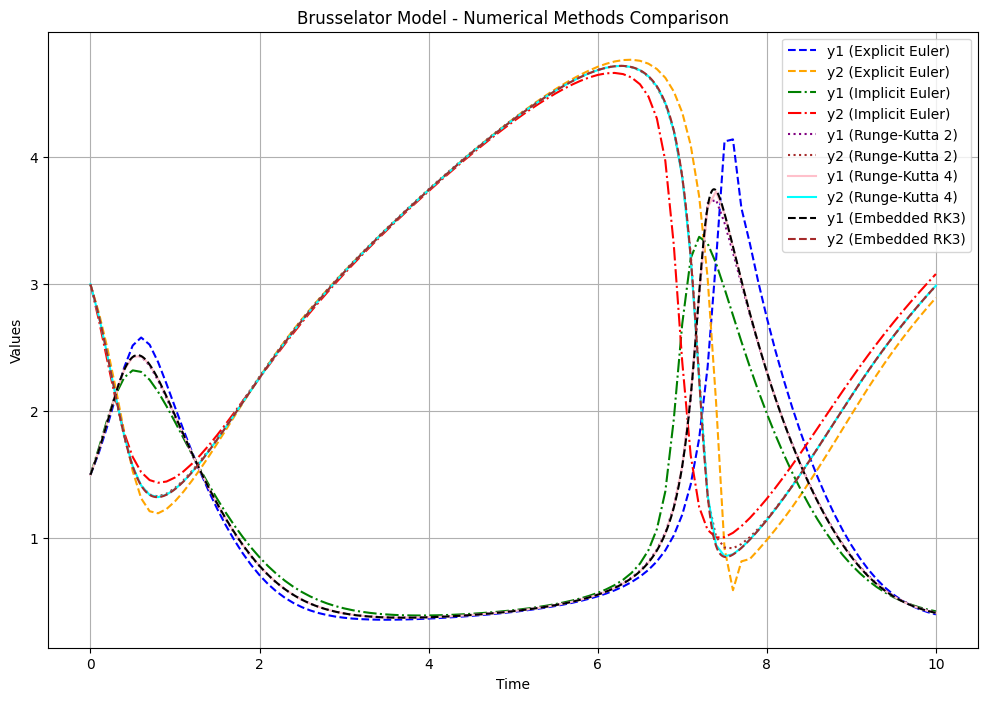

In [ ]:
#Brusselator
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Brusselator Model
def brusselator(t, y, a=1, b=3):
    y1, y2 = y
    dy1_dt = 1 + a * y1**2 * y2 - (1 + b) * y1
    dy2_dt = -a * y1**2 * y2 + b * y1
    return np.array([dy1_dt, dy2_dt])

# Explicit Euler Method
def explicit_euler(f, t0, y0, t_end, h):
    t_values = np.arange(t0, t_end + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0

    for i in range(1, len(t_values)):
        y_values[i] = y_values[i - 1] + h * f(t_values[i - 1], y_values[i - 1])

    return t_values, y_values

# Implicit Euler Method
def implicit_euler(f, t0, y0, t_end, h):
    t_values = np.arange(t0, t_end + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0

    for i in range(1, len(t_values)):
        def g(y_next):
            return y_next - y_values[i - 1] - h * f(t_values[i], y_next)

        y_next = fsolve(g, y_values[i - 1])
        y_values[i] = y_next

    return t_values, y_values

# Runge-Kutta 2nd Order Method
def runge_kutta_2(f, t0, y0, t_end, h):
    t_values = np.arange(t0, t_end + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0

    for i in range(1, len(t_values)):
        t = t_values[i - 1]
        y = y_values[i - 1]

        k1 = f(t, y)
        k2 = f(t + h / 2, y + h / 2 * k1)

        y_values[i] = y + h * k2

    return t_values, y_values

# Runge-Kutta 4th Order Method
def runge_kutta_4(f, t0, y0, t_end, h):
    t_values = np.arange(t0, t_end + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0

    for i in range(1, len(t_values)):
        t = t_values[i - 1]
        y = y_values[i - 1]

        k1 = f(t, y)
        k2 = f(t + h / 2, y + h / 2 * k1)
        k3 = f(t + h / 2, y + h / 2 * k2)
        k4 = f(t + h, y + h * k3)

        y_values[i] = y + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

    return t_values, y_values

# Embedded Runge-Kutta 3rd Order Method
def embedded_runge_kutta_3(f, t0, y0, t_end, h, tol):
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0

    while t < t_end:
        k1 = f(t, y)
        k2 = f(t + h / 3, y + h / 3 * k1)
        k3 = f(t + 2 * h / 3, y + 2 * h / 3 * k2)
        k4 = f(t + h, y + h * k3)

        y_high = y + h * (1 / 8 * k1 + 3 / 8 * k2 + 3 / 8 * k3 + 1 / 8 * k4)
        y_low = y + h * (1 / 6 * k1 + 2 / 6 * k2 + 2 / 6 * k3)

        error = np.linalg.norm(y_high - y_low, ord=2)

        if error <= tol:
            t += h
            y = y_high
            t_values.append(t)
            y_values.append(y)

        h = h * min(5, max(0.2, 0.9 * (tol / error) ** (1 / 4)))

        if h < 1e-6:
            raise RuntimeError("Step size became too small.")

    return np.array(t_values), np.array(y_values)

# Simulation Parameters
t0, t_end, h = 0, 10, 0.1
y0 = np.array([1.5, 3])
tol = 1e-5

# Compute Numerical Solutions
t_values_Explicit_Euler, y_Explicit_Euler = explicit_euler(brusselator, t0, y0, t_end, h)
t_values_Implicit_Euler, y_Implicit_Euler = implicit_euler(brusselator, t0, y0, t_end, h)
t_values_Runge_Kutta_2, y_Runge_Kutta_2 = runge_kutta_2(brusselator, t0, y0, t_end, h)
t_values_Runge_Kutta_4, y_Runge_Kutta_4 = runge_kutta_4(brusselator, t0, y0, t_end, h)
t_values_Embedded_RK3, y_Embedded_RK3 = embedded_runge_kutta_3(brusselator, t0, y0, t_end, h, tol)

# Plot Solutions
plt.figure(figsize=(12, 8))
plt.plot(t_values_Explicit_Euler, y_Explicit_Euler[:, 0], label="y1 (Explicit Euler)", linestyle="--", color="blue")
plt.plot(t_values_Explicit_Euler, y_Explicit_Euler[:, 1], label="y2 (Explicit Euler)", linestyle="--", color="orange")
plt.plot(t_values_Implicit_Euler, y_Implicit_Euler[:, 0], label="y1 (Implicit Euler)", linestyle="-.", color="green")
plt.plot(t_values_Implicit_Euler, y_Implicit_Euler[:, 1], label="y2 (Implicit Euler)", linestyle="-.", color="red")
plt.plot(t_values_Runge_Kutta_2, y_Runge_Kutta_2[:, 0], label="y1 (Runge-Kutta 2)", linestyle=":", color="purple")
plt.plot(t_values_Runge_Kutta_2, y_Runge_Kutta_2[:, 1], label="y2 (Runge-Kutta 2)", linestyle=":", color="brown")
plt.plot(t_values_Runge_Kutta_4, y_Runge_Kutta_4[:, 0], label="y1 (Runge-Kutta 4)", linestyle="-", color="pink")
plt.plot(t_values_Runge_Kutta_4, y_Runge_Kutta_4[:, 1], label="y2 (Runge-Kutta 4)", linestyle="-", color="cyan")
plt.plot(t_values_Embedded_RK3, y_Embedded_RK3[:, 0], label="y1 (Embedded RK3)", linestyle="--", color="black")
plt.plot(t_values_Embedded_RK3, y_Embedded_RK3[:, 1], label="y2 (Embedded RK3)", linestyle="--", color="brown")
plt.xlabel("Time")
plt.ylabel("Values")
plt.title("Brusselator Model - Numerical Methods Comparison")
plt.legend()
plt.grid()
plt.show()


<ipython-input-69-1133b6f5e0e5>:9: RuntimeWarning: overflow encountered in scalar power
  dy1_dt = 1 + a * y1**2 * y2 - (1 + b) * y1
<ipython-input-69-1133b6f5e0e5>:10: RuntimeWarning: overflow encountered in scalar power
  dy2_dt = -a * y1**2 * y2 + b * y1
<ipython-input-69-1133b6f5e0e5>:20: RuntimeWarning: invalid value encountered in add
  y_values[i] = y_values[i - 1] + h * f(t_values[i - 1], y_values[i - 1])
<ipython-input-69-1133b6f5e0e5>:34: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  y_next = fsolve(g, y_values[i - 1])


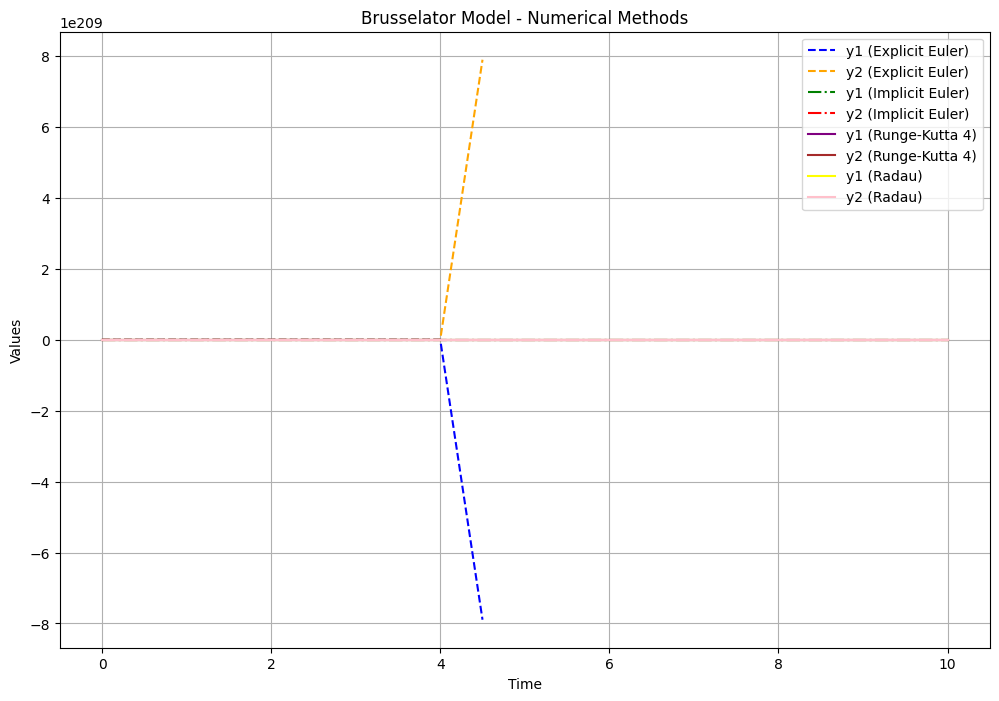

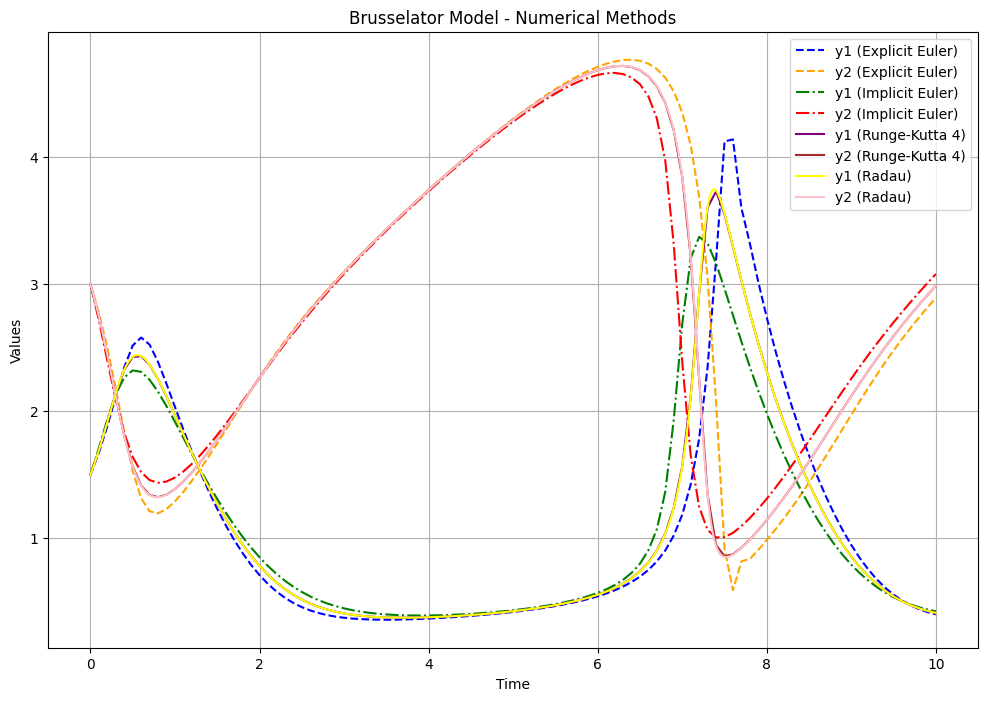

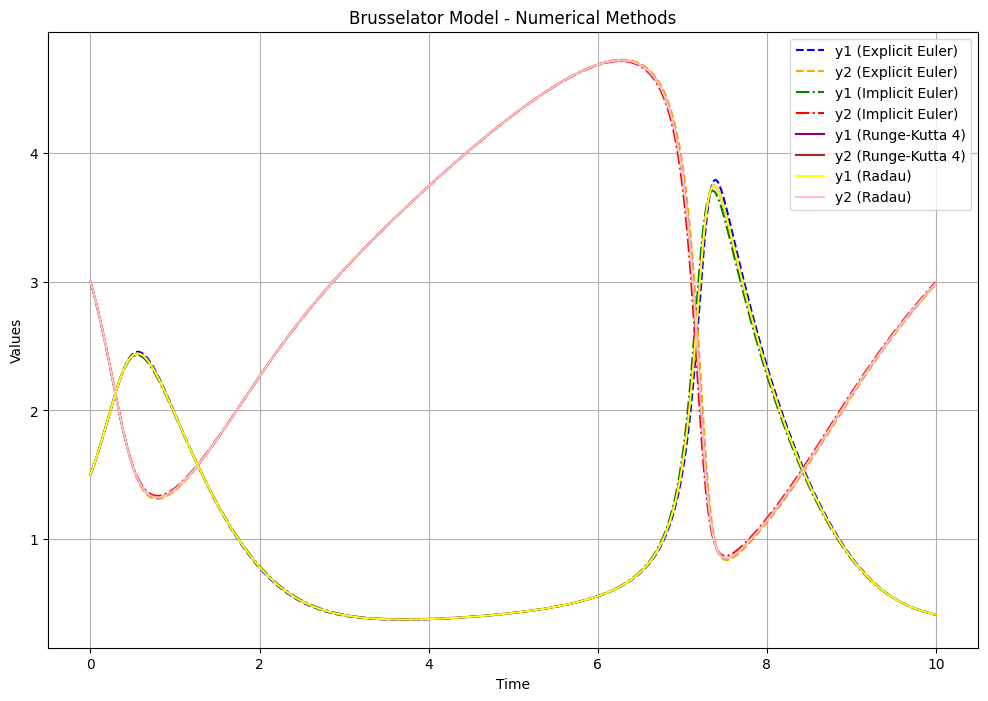

In [ ]:
# Brusselator : Explicit Euler Method , Implicit Euler Method , Runge-Kutta 4th Order Method


import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp

# Brusselator Model
def brusselator(t, y, a=1, b=3):
    y1, y2 = y
    dy1_dt = 1 + a * y1**2 * y2 - (1 + b) * y1
    dy2_dt = -a * y1**2 * y2 + b * y1
    return np.array([dy1_dt, dy2_dt])

# Explicit Euler Method
def explicit_euler(f, t0, y0, t_end, h):
    t_values = np.arange(t0, t_end + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0

    for i in range(1, len(t_values)):
        y_values[i] = y_values[i - 1] + h * f(t_values[i - 1], y_values[i - 1])

    return t_values, y_values

# Implicit Euler Method
def implicit_euler(f, t0, y0, t_end, h):
    t_values = np.arange(t0, t_end + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0

    for i in range(1, len(t_values)):
        def g(y_next):
            return y_next - y_values[i - 1] - h * f(t_values[i], y_next)

        y_next = fsolve(g, y_values[i - 1])
        y_values[i] = y_next

    return t_values, y_values

# Runge-Kutta 4th Order Method
def runge_kutta_4(f, t0, y0, t_end, h):
    t_values = np.arange(t0, t_end + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0

    for i in range(1, len(t_values)):
        t = t_values[i - 1]
        y = y_values[i - 1]

        k1 = f(t, y)
        k2 = f(t + h / 2, y + h / 2 * k1)
        k3 = f(t + h / 2, y + h / 2 * k2)
        k4 = f(t + h, y + h * k3)

        y_values[i] = y + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

    return t_values, y_values

# Simulation Parameters
t0, t_end = 0, 10
y0 = np.array([1.5, 3])
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Compute Numerical Solutions
for h in [0.5 , 0.1 , 0.01]:
    t_values_Explicit_Euler, y_Explicit_Euler = explicit_euler(brusselator, t0, y0, t_end, h)
    t_values_Implicit_Euler, y_Implicit_Euler = implicit_euler(brusselator, t0, y0, t_end, h)
    t_values_Runge_Kutta_4 , y_Runge_Kutta_4  = runge_kutta_4 (brusselator, t0, y0, t_end, h)
    solution = solve_ivp(brusselator, t_span, y0, method='Radau', t_eval=t_eval)

    # Plot Solutions
    plt.figure(figsize=(12, 8))
    plt.plot(t_values_Explicit_Euler, y_Explicit_Euler[:, 0], label="y1 (Explicit Euler)", linestyle="--", color="blue"  )
    plt.plot(t_values_Explicit_Euler, y_Explicit_Euler[:, 1], label="y2 (Explicit Euler)", linestyle="--", color="orange")
    plt.plot(t_values_Implicit_Euler, y_Implicit_Euler[:, 0], label="y1 (Implicit Euler)", linestyle="-.", color="green" )
    plt.plot(t_values_Implicit_Euler, y_Implicit_Euler[:, 1], label="y2 (Implicit Euler)", linestyle="-.", color="red"   )
    plt.plot(t_values_Runge_Kutta_4 , y_Runge_Kutta_4[:, 0] , label="y1 (Runge-Kutta 4)" , linestyle="-" , color="purple")
    plt.plot(t_values_Runge_Kutta_4 , y_Runge_Kutta_4[:, 1] , label="y2 (Runge-Kutta 4)" , linestyle="-" , color="brown" )
    plt.plot(solution.t             , solution.y[0]         , label="y1 (Radau)"         , linestyle="-" , color="yellow")
    plt.plot(solution.t             , solution.y[1]         , label="y2 (Radau)"         , linestyle="-" , color="pink"  )
    plt.xlabel("Time")
    plt.ylabel("Values")
    plt.title("Brusselator Model - Numerical Methods")
    plt.legend()
    plt.grid()
    plt.show()

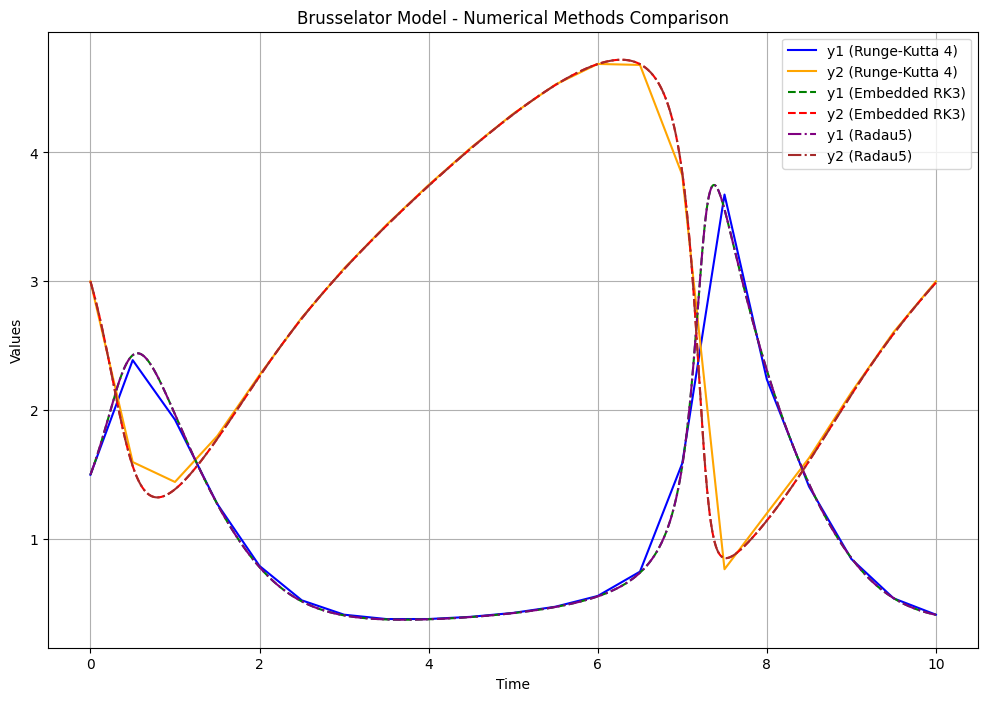

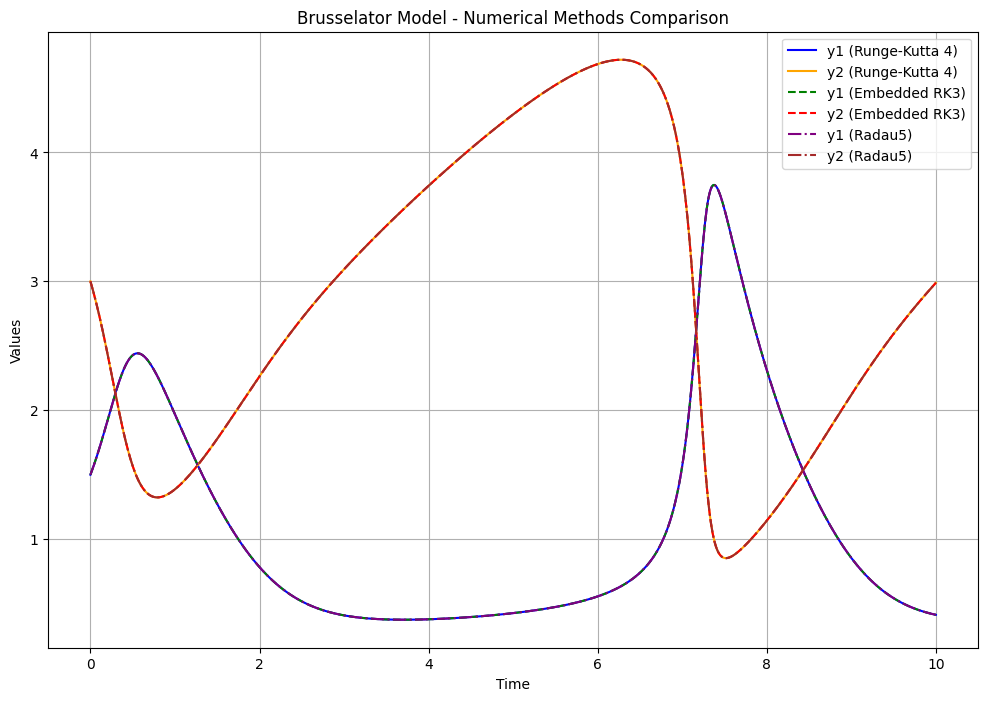

In [ ]:
#Brusselator : Runge-Kutta 4th Order Method (RK4) , Embedded Runge-Kutta 3rd Order Method , Using Radau5 with SciPy
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the Brusselator system
def brusselator(t, y, a=1, b=3):
    y1, y2 = y
    dy1_dt = 1 + a * y1**2 * y2 - (1 + b) * y1
    dy2_dt = -a * y1**2 * y2 + b * y1
    return np.array([dy1_dt, dy2_dt])

# Runge-Kutta 4th Order Method (RK4)
def runge_kutta_4(f, t0, y0, t_end, h):
    t_values = np.arange(t0, t_end + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0

    for i in range(1, len(t_values)):
        t = t_values[i - 1]
        y = y_values[i - 1]

        k1 = f(t, y)
        k2 = f(t + h / 2, y + h / 2 * k1)
        k3 = f(t + h / 2, y + h / 2 * k2)
        k4 = f(t + h, y + h * k3)

        y_values[i] = y + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

    return t_values, y_values

# Embedded Runge-Kutta 3rd Order Method
def embedded_runge_kutta_3(f, t0, y0, t_end, h, tol):
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0

    while t < t_end:
        k1 = f(t, y)
        k2 = f(t + h / 3, y + h / 3 * k1)
        k3 = f(t + 2 * h / 3, y + 2 * h / 3 * k2)
        k4 = f(t + h, y + h * k3)

        y_high = y + h * (1 / 8 * k1 + 3 / 8 * k2 + 3 / 8 * k3 + 1 / 8 * k4)
        y_low = y + h * (1 / 6 * k1 + 2 / 6 * k2 + 2 / 6 * k3)

        error = np.linalg.norm(y_high - y_low, ord=2)

        if error <= tol:
            t += h
            y = y_high
            t_values.append(t)
            y_values.append(y)

        h = h * min(5, max(0.2, 0.9 * (tol / error) ** (1 / 4)))

        if h < 1e-6:
            raise RuntimeError("Step size became too small.")

    return np.array(t_values), np.array(y_values)

# Using Radau5 with SciPy
def solve_with_radau(f, t_span, y0, t_eval):
    solution = solve_ivp(f, t_span, y0, method='Radau', t_eval=t_eval)
    return solution.t, solution.y

# Simulation Parameters
t0, t_end= 0, 10
y0 = np.array([1.5, 3])
t_span = (t0, t_end)
t_eval = np.linspace(t_span[0], t_span[1], 1000)
tol = 1e-5
for h in [0.5 , 0.01]:
  # Run Simulations
  t_values_RK4, y_RK4 = runge_kutta_4(brusselator, t0, y0, t_end, h)
  t_values_Embedded_RK3, y_Embedded_RK3 = embedded_runge_kutta_3(brusselator, t0, y0, t_end, h, tol)
  t_values_Radau, y_Radau = solve_with_radau(brusselator, t_span, y0, t_eval)

  # Plot Solutions
  plt.figure(figsize=(12, 8))
  plt.plot(t_values_RK4, y_RK4[:, 0], label="y1 (Runge-Kutta 4)", linestyle="-", color="blue")
  plt.plot(t_values_RK4, y_RK4[:, 1], label="y2 (Runge-Kutta 4)", linestyle="-", color="orange")
  plt.plot(t_values_Embedded_RK3, y_Embedded_RK3[:, 0], label="y1 (Embedded RK3)", linestyle="--", color="green")
  plt.plot(t_values_Embedded_RK3, y_Embedded_RK3[:, 1], label="y2 (Embedded RK3)", linestyle="--", color="red")
  plt.plot(t_values_Radau, y_Radau[0], label="y1 (Radau5)", linestyle="-.", color="purple")
  plt.plot(t_values_Radau, y_Radau[1], label="y2 (Radau5)", linestyle="-.", color="brown")
  plt.xlabel("Time")
  plt.ylabel("Values")
  plt.title("Brusselator Model - Numerical Methods Comparison")
  plt.legend()
  plt.grid()
  plt.show()

In [ ]:
# Brusselator : Compute stiffness ratio

import numpy as np

def jacobian(y, a=1, b=3):
  y1, y2 = y
  J = np.array([
       [2 * a * y1 * y2 - (1 + b), a * y1**2],
       [-2 * a * y1 * y2 + b, -a * y1**2]
  ])
  return J

# Compute stiffness ratio
def stiffness_ratio(y, a=1, b=3):
    J = jacobian(y, a, b)
    eigenvalues = np.linalg.eigvals(J)
    max_eigen = np.max(np.abs(eigenvalues))
    min_eigen = np.min(np.abs(eigenvalues))
    ratio = max_eigen / min_eigen
    return ratio, eigenvalues

# Initial conditions
y0 = np.array([1.5, 3])

# Compute stiffness
ratio, eigenvalues = stiffness_ratio(y0)

# Display results
print("Eigenvalues of the Jacobian:", eigenvalues)
print("Stiffness Ratio:", ratio)
if ratio > 100:
    print("The system is stiff.")
else:
    print("The system is not stiff.")

Eigenvalues of the Jacobian: [1.375+0.59947894j 1.375-0.59947894j]
Stiffness Ratio: 1.0
The system is not stiff.


<ipython-input-101-aa9a6283682f>:19: RuntimeWarning: overflow encountered in scalar multiply
  dy1_dt = 1 + a * y1**2 * y2 - (1 + b) * y1
<ipython-input-101-aa9a6283682f>:20: RuntimeWarning: overflow encountered in scalar multiply
  dy2_dt = -a * y1**2 * y2 + b * y1
<ipython-input-101-aa9a6283682f>:30: RuntimeWarning: invalid value encountered in add
  y_values[i] = y_values[i - 1] + h * f(t_values[i - 1], y_values[i - 1])


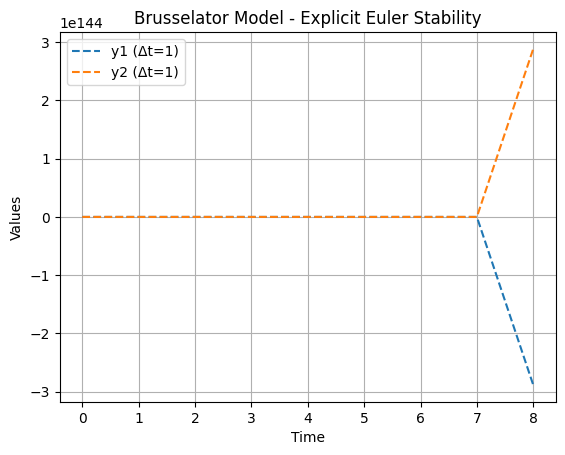

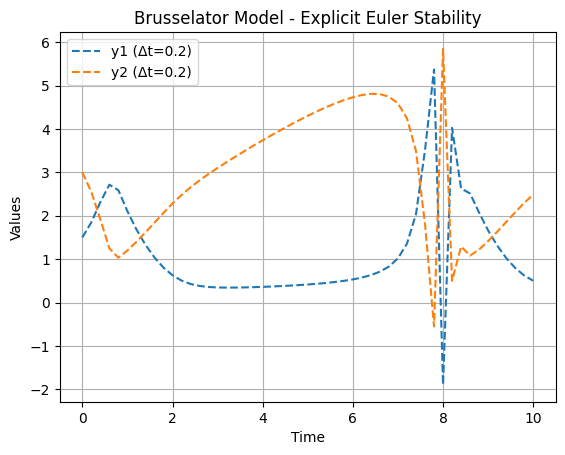

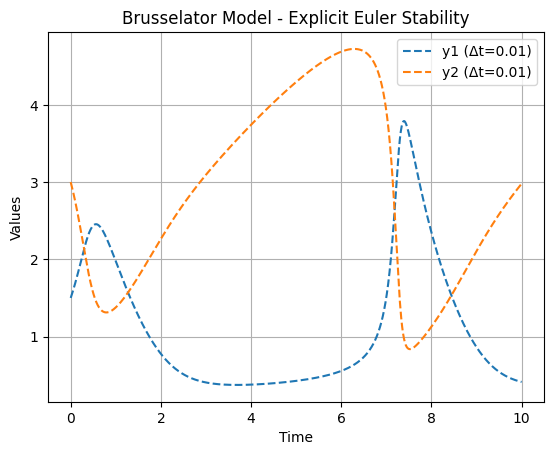

In [ ]:
#Brusselator : Explicit methods with fixed time step

import numpy as np
import matplotlib.pyplot as plt

# Define the Brusselator system
def brusselator(t, y, a=1, b=3):
    y1, y2 = y
    dy1_dt = 1 + a * y1**2 * y2 - (1 + b) * y1
    dy2_dt = -a * y1**2 * y2 + b * y1
    return np.array([dy1_dt, dy2_dt])

# Explicit Euler Method
def explicit_euler(f, t0, y0, t_end, h):
    t_values = np.arange(t0, t_end + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0

    for i in range(1, len(t_values)):
        y_values[i] = y_values[i - 1] + h * f(t_values[i - 1], y_values[i - 1])

    return t_values, y_values

# Parameters
t0, t_end = 0, 10
y0 = np.array([1.5, 3])

# Experiment with different time steps
for h in [1 , 0.2, 0.01 ]:
    t_values, y_values = explicit_euler(brusselator, t0, y0, t_end, h)
    plt.plot(t_values, y_values[:, 0], linestyle="--", label=f"y1 (Δt={h})")
    plt.plot(t_values, y_values[:, 1], linestyle="--", label=f"y2 (Δt={h})")
    plt.xlabel("Time")
    plt.ylabel("Values")
    plt.title("Brusselator Model - Explicit Euler Stability")
    plt.legend()
    plt.grid()
    plt.show()

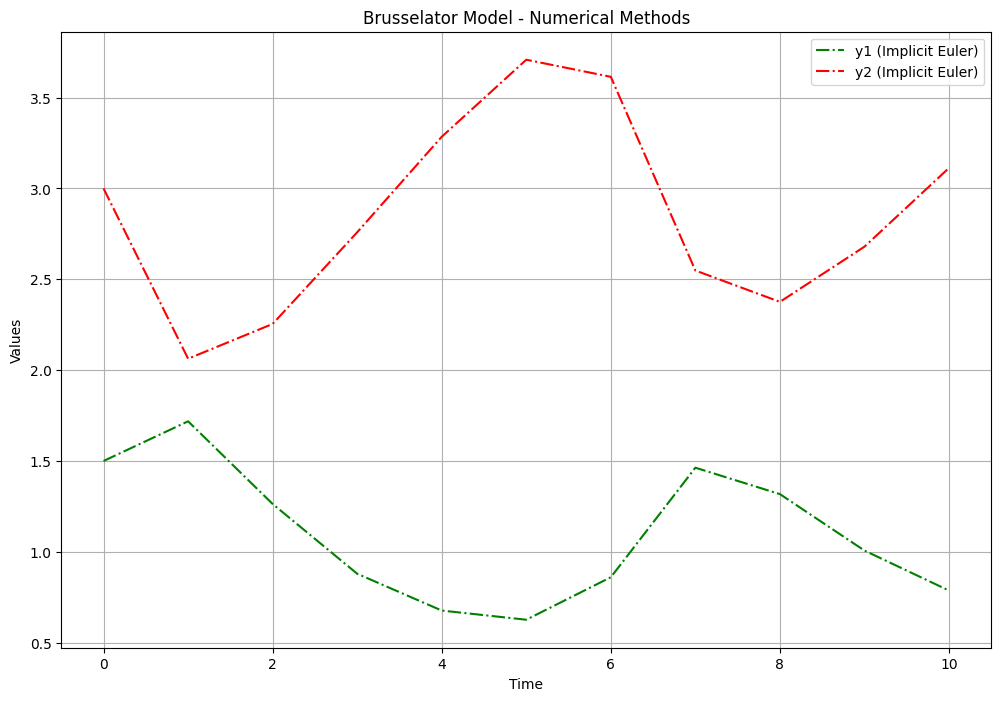

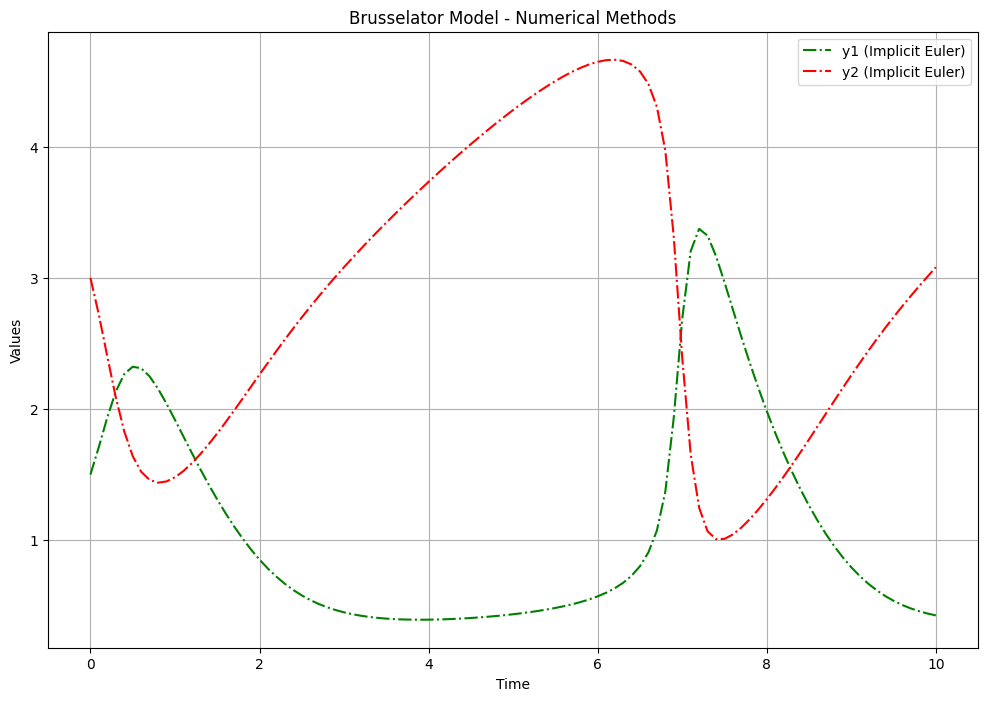

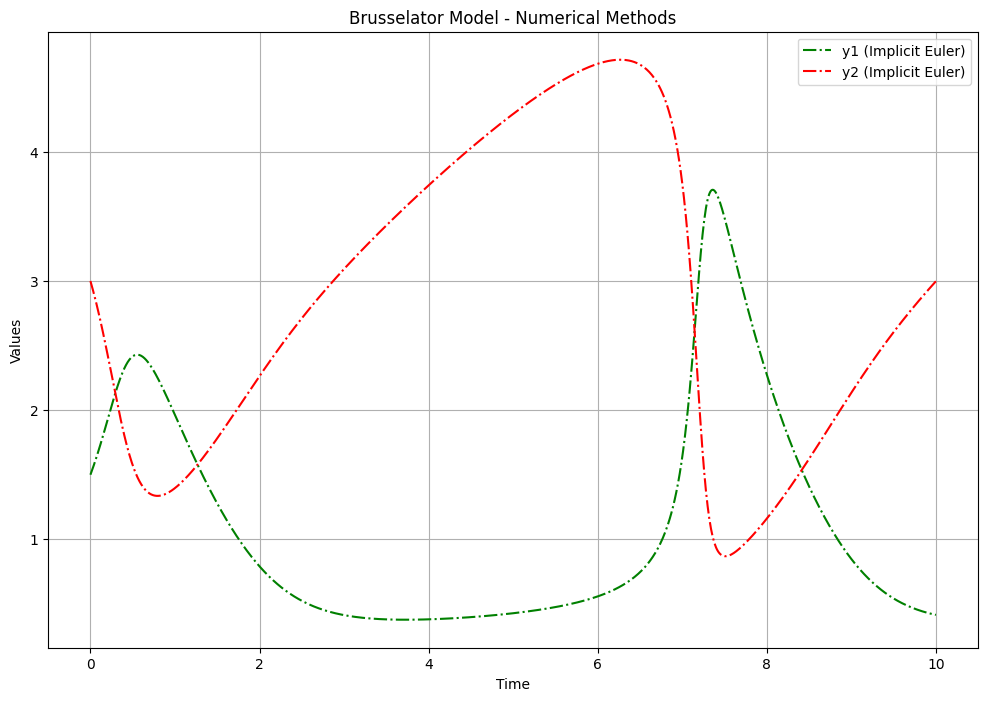

In [ ]:
# Brusselator : Implicit Euler Method


import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp

# Brusselator Model
def brusselator(t, y, a=1, b=3):
    y1, y2 = y
    dy1_dt = 1 + a * y1**2 * y2 - (1 + b) * y1
    dy2_dt = -a * y1**2 * y2 + b * y1
    return np.array([dy1_dt, dy2_dt])

# Implicit Euler Method
def implicit_euler(f, t0, y0, t_end, h):
    t_values = np.arange(t0, t_end + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0

    for i in range(1, len(t_values)):
        def g(y_next):
            return y_next - y_values[i - 1] - h * f(t_values[i], y_next)

        y_next = fsolve(g, y_values[i - 1])
        y_values[i] = y_next

    return t_values, y_values

# Simulation Parameters
t0, t_end = 0, 10
y0 = np.array([1.5, 3])
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Compute Numerical Solutions
for h in [1 , 0.1 , 0.01]:
    t_values_Implicit_Euler, y_Implicit_Euler = implicit_euler(brusselator, t0, y0, t_end, h)

    # Plot Solutions
    plt.figure(figsize=(12, 8))
    plt.plot(t_values_Implicit_Euler, y_Implicit_Euler[:, 0], label="y1 (Implicit Euler)", linestyle="-.", color="green" )
    plt.plot(t_values_Implicit_Euler, y_Implicit_Euler[:, 1], label="y2 (Implicit Euler)", linestyle="-.", color="red"   )
    plt.xlabel("Time")
    plt.ylabel("Values")
    plt.title("Brusselator Model - Numerical Methods")
    plt.legend()
    plt.grid()
    plt.show()

<ipython-input-9-466149e9f350>:9: RuntimeWarning: overflow encountered in scalar multiply
  dy2_dt = (q * y3 - y3 * y2 + y2 * (1 - y2)) / eps
<ipython-input-9-466149e9f350>:10: RuntimeWarning: overflow encountered in scalar multiply
  dy3_dt = (-q * y3 - y3 * y2 + f * y1) / mu
<ipython-input-9-466149e9f350>:10: RuntimeWarning: invalid value encountered in scalar subtract
  dy3_dt = (-q * y3 - y3 * y2 + f * y1) / mu
<ipython-input-9-466149e9f350>:8: RuntimeWarning: invalid value encountered in scalar subtract
  dy1_dt = y2 - y1


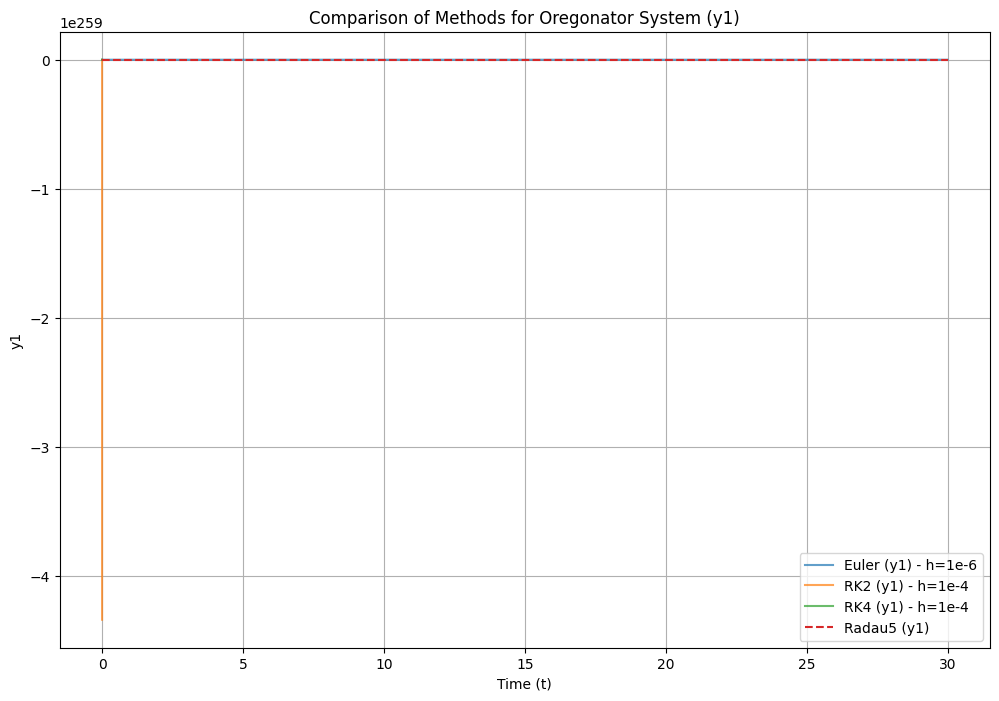

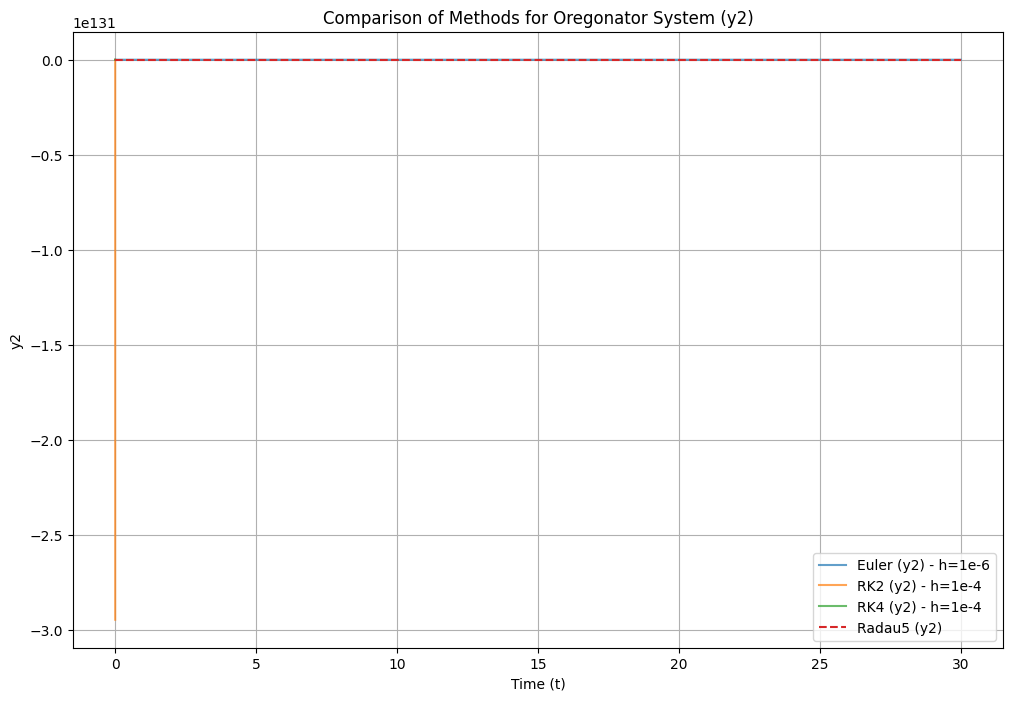

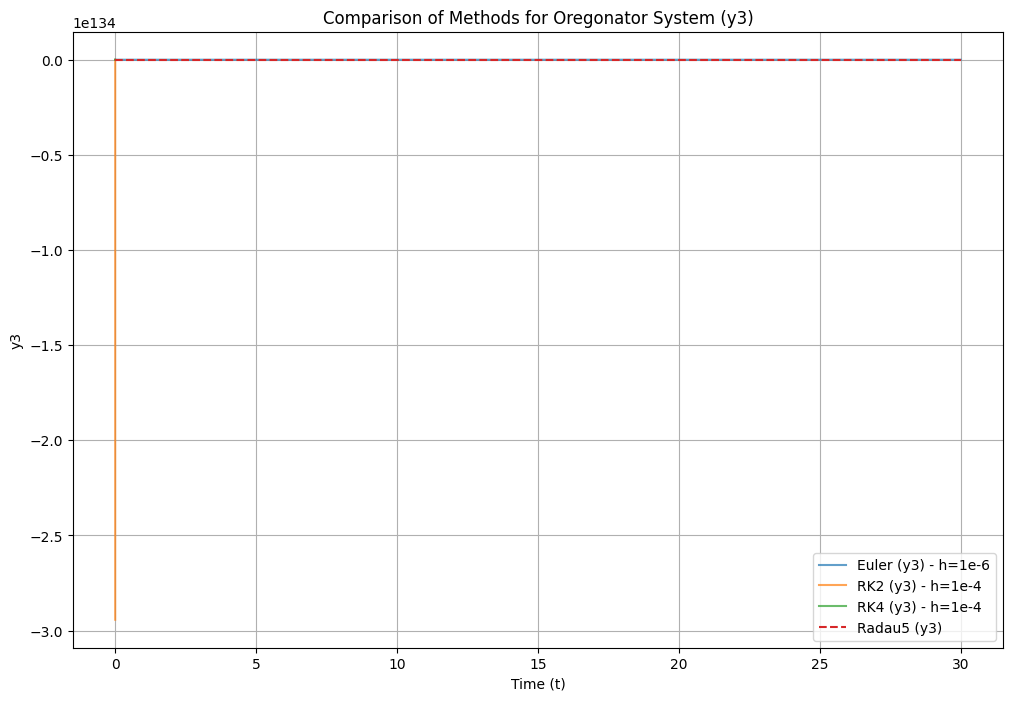

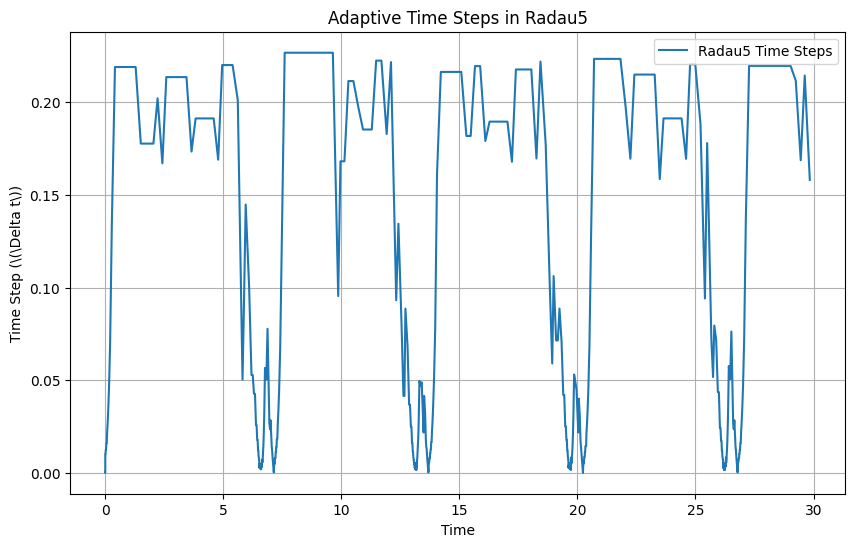

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#Oregonator
def oregonator(t, y, eps=1e-2, mu=1e-5, f=1, q=2e-4):
    y1, y2, y3 = y
    dy1_dt = y2 - y1
    dy2_dt = (q * y3 - y3 * y2 + y2 * (1 - y2)) / eps
    dy3_dt = (-q * y3 - y3 * y2 + f * y1) / mu
    return np.array([dy1_dt, dy2_dt, dy3_dt])

#Euler
def explicit_euler(f, t0, y0, t_end, h):
    t_values = np.arange(t0, t_end + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0
    for i in range(1, len(t_values)):
        y_values[i] = y_values[i - 1] + h * f(t_values[i - 1], y_values[i - 1])
    return t_values, y_values

#Runge-Kutta
def runge_kutta_2(f, t0, y0, t_end, h):
    t_values = np.arange(t0, t_end + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0
    for i in range(1, len(t_values)):
        t = t_values[i - 1]
        y = y_values[i - 1]
        k1 = f(t, y)
        k2 = f(t + h / 2, y + h / 2 * k1)
        y_values[i] = y + h * k2
    return t_values, y_values

#Runge-Kutta
def runge_kutta_4(f, t0, y0, t_end, h):
    t_values = np.arange(t0, t_end + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0
    for i in range(1, len(t_values)):
        t = t_values[i - 1]
        y = y_values[i - 1]
        k1 = f(t, y)
        k2 = f(t + h / 2, y + h / 2 * k1)
        k3 = f(t + h / 2, y + h / 2 * k2)
        k4 = f(t + h, y + h * k3)
        y_values[i] = y + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
    return t_values, y_values

#Initial Values
t0, t_end = 0, 30
y0 = np.array([0.5, 0, 1200])

#Time Steps for Explicit
h_small = 1e-6
h_medium = 1e-4


t_euler, y_euler = explicit_euler(oregonator, t0, y0, t_end, h_small)
t_rk2, y_rk2 = runge_kutta_2(oregonator, t0, y0, t_end, h_medium)
t_rk4, y_rk4 = runge_kutta_4(oregonator, t0, y0, t_end, h_medium)

#Radau5
tol = 1e-5
solution_radau = solve_ivp(oregonator, [t0, t_end], y0, method="Radau", atol=tol, rtol=tol)

#Plot y1
plt.figure(figsize=(12, 8))
plt.plot(t_euler, y_euler[:, 0], label="Euler (y1) - h=1e-6", alpha=0.7)
plt.plot(t_rk2, y_rk2[:, 0], label="RK2 (y1) - h=1e-4", alpha=0.7)
plt.plot(t_rk4, y_rk4[:, 0], label="RK4 (y1) - h=1e-4", alpha=0.7)
plt.plot(solution_radau.t, solution_radau.y[0], label="Radau5 (y1)", linestyle='--')
plt.xlabel("Time (t)")
plt.ylabel("y1")
plt.title("Comparison of Methods for Oregonator System (y1)")
plt.legend()
plt.grid()
plt.show()

#Plot y2
plt.figure(figsize=(12, 8))
plt.plot(t_euler, y_euler[:, 1], label="Euler (y2) - h=1e-6", alpha=0.7)
plt.plot(t_rk2, y_rk2[:, 1], label="RK2 (y2) - h=1e-4", alpha=0.7)
plt.plot(t_rk4, y_rk4[:, 1], label="RK4 (y2) - h=1e-4", alpha=0.7)
plt.plot(solution_radau.t, solution_radau.y[1], label="Radau5 (y2)", linestyle='--')
plt.xlabel("Time (t)")
plt.ylabel("y2")
plt.title("Comparison of Methods for Oregonator System (y2)")
plt.legend()
plt.grid()
plt.show()

#Plot y3
plt.figure(figsize=(12, 8))
plt.plot(t_euler, y_euler[:, 2], label="Euler (y3) - h=1e-6", alpha=0.7)
plt.plot(t_rk2, y_rk2[:, 2], label="RK2 (y3) - h=1e-4", alpha=0.7)
plt.plot(t_rk4, y_rk4[:, 2], label="RK4 (y3) - h=1e-4", alpha=0.7)
plt.plot(solution_radau.t, solution_radau.y[2], label="Radau5 (y3)", linestyle='--')
plt.xlabel("Time (t)")
plt.ylabel("y3")
plt.title("Comparison of Methods for Oregonator System (y3)")
plt.legend()
plt.grid()
plt.show()

#Radau 5, Changing Time Steps
time_steps_radau = np.diff(solution_radau.t)
plt.figure(figsize=(10, 6))
plt.plot(solution_radau.t[:-1], time_steps_radau, label="Radau5 Time Steps")
plt.xlabel("Time")
plt.ylabel("Time Step (\(\Delta t\))")
plt.title("Adaptive Time Steps in Radau5")
plt.legend()
plt.grid()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#Oregonator
def oregonator(t, y, eps=1e-2, mu=1e-5, f=1, q=2e-4):
    y1, y2, y3 = y
    dy1_dt = y2 - y1
    dy2_dt = (q * y3 - y3 * y2 + y2 * (1 - y2)) / eps
    dy3_dt = (-q * y3 - y3 * y2 + f * y1) / mu
    return np.array([dy1_dt, dy2_dt, dy3_dt])

# Explicit Euler
def explicit_euler(f, t0, y0, t_end, h):
    t_values = np.arange(t0, t_end, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0
    for i in range(1, len(t_values)):
        y_values[i] = y_values[i - 1] + h * f(t_values[i - 1], y_values[i - 1])
    return t_values, y_values

# Runge-Kutta 2nd
def runge_kutta_2(f, t0, y0, t_end, h):
    t_values = np.arange(t0, t_end, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0
    for i in range(1, len(t_values)):
        t = t_values[i - 1]
        y = y_values[i - 1]
        k1 = f(t, y)
        k2 = f(t + h / 2, y + h / 2 * k1)
        y_values[i] = y + h * k2
    return t_values, y_values

# Runge-Kutta 4th
def runge_kutta_4(f, t0, y0, t_end, h):
    t_values = np.arange(t0, t_end, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0
    for i in range(1, len(t_values)):
        t = t_values[i - 1]
        y = y_values[i - 1]
        k1 = f(t, y)
        k2 = f(t + h / 2, y + h / 2 * k1)
        k3 = f(t + h / 2, y + h / 2 * k2)
        k4 = f(t + h, y + h * k3)
        y_values[i] = y + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
    return t_values, y_values

# Initial Values
t0, t_end = 0, 30
y0 = np.array([0.5, 0, 1200])

h = 1e-6

t_values_euler, y_euler = explicit_euler(oregonator, t0, y0, t_end, h)
t_values_rk2, y_rk2 = runge_kutta_2(oregonator, t0, y0, t_end, h)
t_values_rk4, y_rk4 = runge_kutta_4(oregonator, t0, y0, t_end, h)

#Radau5
tol = 1e-5
solution_radau = solve_ivp(oregonator, [t0, t_end], y0, method="Radau", atol=tol, rtol=tol)

#Plot
plt.figure(figsize=(12, 8))
plt.plot(t_values_euler, y_euler[:, 0], label="Euler (y1)", alpha=0.7)
plt.plot(t_values_rk2, y_rk2[:, 0], label="RK2 (y1)", alpha=0.7)
plt.plot(t_values_rk4, y_rk4[:, 0], label="RK4 (y1)", alpha=0.7)
plt.plot(solution_radau.t, solution_radau.y[0], label="Radau5 (y1)", linestyle='--')
plt.xlabel("Time (t)")
plt.ylabel("y1")
plt.title("Comparison of Methods for Oregonator System")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Adjusted step sizes for better performance
h_euler = 1e-4  # Larger step size for Euler method
h_rk4 = 1e-3    # Reasonable step size for RK4 method

# Solve using explicit Euler with adjusted step size
t_euler, y_euler = explicit_euler(oregonator, t0, y0, t_end, h_euler)

# Solve using RK4 with adjusted step size
t_rk4, y_rk4 = runge_kutta_4(oregonator, t0, y0, t_end, h_rk4)

# Plot y1 comparison with adjusted step sizes
plt.figure(figsize=(12, 8))
plt.plot(t_euler, y_euler[:, 0], label="Euler (y1) - h=1e-4", alpha=0.7)
plt.plot(t_rk4, y_rk4[:, 0], label="RK4 (y1) - h=1e-3", alpha=0.7)
plt.plot(solution_radau.t, solution_radau.y[0], label="Radau5 (y1)", linestyle='--')
plt.xlabel("Time (t)")
plt.ylabel("y1")
plt.title("Comparison of Methods for Oregonator System (y1) - Adjusted Step Sizes")
plt.legend()
plt.grid()
plt.show()

# Plot y2 comparison with adjusted step sizes
plt.figure(figsize=(12, 8))
plt.plot(t_euler, y_euler[:, 1], label="Euler (y2) - h=1e-4", alpha=0.7)
plt.plot(t_rk4, y_rk4[:, 1], label="RK4 (y2) - h=1e-3", alpha=0.7)
plt.plot(solution_radau.t, solution_radau.y[1], label="Radau5 (y2)", linestyle='--')
plt.xlabel("Time (t)")
plt.ylabel("y2")
plt.title("Comparison of Methods for Oregonator System (y2) - Adjusted Step Sizes")
plt.legend()
plt.grid()
plt.show()

# Plot y3 comparison with adjusted step sizes
plt.figure(figsize=(12, 8))
plt.plot(t_euler, y_euler[:, 2], label="Euler (y3) - h=1e-4", alpha=0.7)
plt.plot(t_rk4, y_rk4[:, 2], label="RK4 (y3) - h=1e-3", alpha=0.7)
plt.plot(solution_radau.t, solution_radau.y[2], label="Radau5 (y3)", linestyle='--')
plt.xlabel("Time (t)")
plt.ylabel("y3")
plt.title("Comparison of Methods for Oregonator System (y3) - Adjusted Step Sizes")
plt.legend()
plt.grid()
plt.show()

# Plot time steps used by Radau5
time_steps_radau = np.diff(solution_radau.t)
plt.figure(figsize=(10, 6))
plt.plot(solution_radau.t[:-1], time_steps_radau, label="Radau5 Time Steps")
plt.xlabel("Time")
plt.ylabel("Time Step (\(\Delta t\))")
plt.title("Adaptive Time Steps in Radau5 - Adjusted")
plt.legend()
plt.grid()
plt.show()

<ipython-input-12-746e69aeae8a>:8: RuntimeWarning: overflow encountered in scalar multiply
  dy2_dt = (q * y3 - y3 * y2 + y2 * (1 - y2)) / eps
<ipython-input-12-746e69aeae8a>:9: RuntimeWarning: overflow encountered in scalar multiply
  dy3_dt = (-q * y3 - y3 * y2 + f * y1) / mu
<ipython-input-12-746e69aeae8a>:9: RuntimeWarning: invalid value encountered in scalar subtract
  dy3_dt = (-q * y3 - y3 * y2 + f * y1) / mu
<ipython-input-12-746e69aeae8a>:7: RuntimeWarning: invalid value encountered in scalar subtract
  dy1_dt = y2 - y1


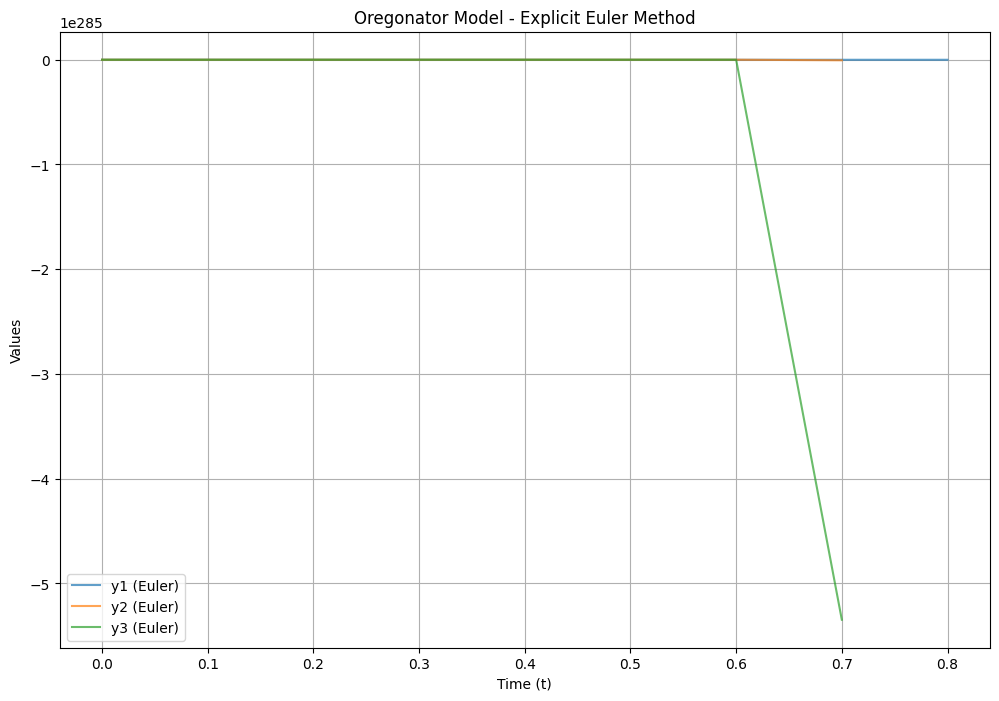

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# The Oregonator model
def oregonator(t, y, eps=1e-2, mu=1e-5, f=1, q=2e-4):
    y1, y2, y3 = y
    dy1_dt = y2 - y1
    dy2_dt = (q * y3 - y3 * y2 + y2 * (1 - y2)) / eps
    dy3_dt = (-q * y3 - y3 * y2 + f * y1) / mu
    return np.array([dy1_dt, dy2_dt, dy3_dt])

# Explicit Euler method
def explicit_euler(f, t0, y0, t_end, h):
    t_values = np.arange(t0, t_end + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0
    for i in range(1, len(t_values)):
        y_values[i] = y_values[i - 1] + h * f(t_values[i - 1], y_values[i - 1])
    return t_values, y_values

# Initial conditions
t0, t_end = 0, 30
y0 = np.array([0.5, 0, 1200])
h_euler = 0.1

# Solve the system
t_euler, y_euler = explicit_euler(oregonator, t0, y0, t_end, h_euler)

# Plot results
plt.figure(figsize=(12, 8))
plt.plot(t_euler, y_euler[:, 0], label="y1 (Euler)", alpha=0.7)
plt.plot(t_euler, y_euler[:, 1], label="y2 (Euler)", alpha=0.7)
plt.plot(t_euler, y_euler[:, 2], label="y3 (Euler)", alpha=0.7)
plt.xlabel("Time (t)")
plt.ylabel("Values")
plt.title("Oregonator Model - Explicit Euler Method")
plt.legend()
plt.grid()
plt.show()

<ipython-input-13-6de75af952d3>:8: RuntimeWarning: overflow encountered in scalar multiply
  dy1_dt = (f - y1 - y1*y3 + y2) / epsilon
<ipython-input-13-6de75af952d3>:9: RuntimeWarning: overflow encountered in scalar multiply
  dy2_dt = y1 - y2 - y1*y2
<ipython-input-13-6de75af952d3>:8: RuntimeWarning: invalid value encountered in scalar subtract
  dy1_dt = (f - y1 - y1*y3 + y2) / epsilon
<ipython-input-13-6de75af952d3>:9: RuntimeWarning: invalid value encountered in scalar subtract
  dy2_dt = y1 - y2 - y1*y2


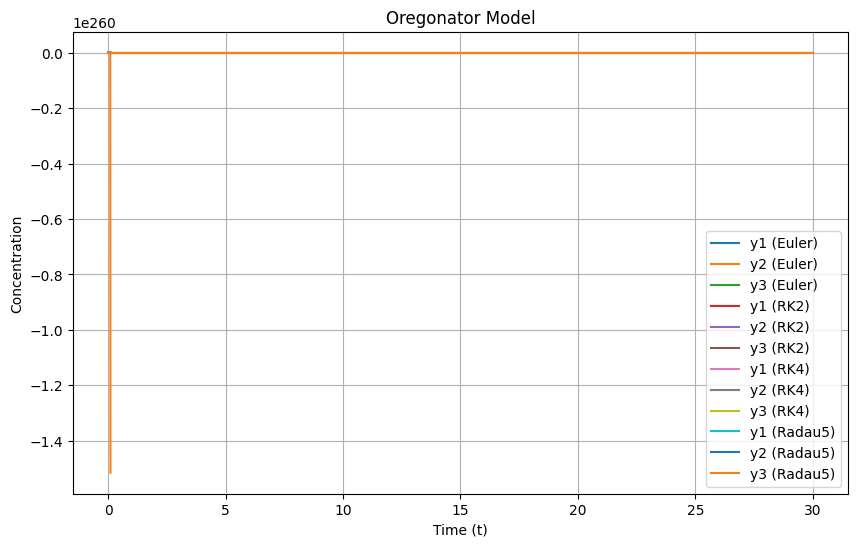

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# The Oregonator system
def oregonator(t, y, epsilon=1e-2, mu=1e-5, f=1, q=2e-4):
    y1, y2, y3 = y
    dy1_dt = (f - y1 - y1*y3 + y2) / epsilon
    dy2_dt = y1 - y2 - y1*y2
    dy3_dt = mu * (y2 - y3)
    return np.array([dy1_dt, dy2_dt, dy3_dt])

# Euler Explicit method
def euler_explicit(f, t0, y0, h, t_end):
    t_values = np.arange(t0, t_end + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0

    for i in range(1, len(t_values)):
        y_values[i] = y_values[i-1] + h * f(t_values[i-1], y_values[i-1])

    return t_values, y_values

# Runge-Kutta 2nd Order method
def runge_kutta_2(f, t0, y0, h, t_end):
    t_values = np.arange(t0, t_end + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0

    for i in range(1, len(t_values)):
        t = t_values[i-1]
        y = y_values[i-1]
        k1 = f(t, y)
        k2 = f(t + h, y + h * k1)
        y_values[i] = y + (h / 2) * (k1 + k2)

    return t_values, y_values

# Runge-Kutta 4th Order method
def runge_kutta_4(f, t0, y0, h, t_end):
    t_values = np.arange(t0, t_end + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0

    for i in range(1, len(t_values)):
        t = t_values[i-1]
        y = y_values[i-1]
        k1 = f(t, y)
        k2 = f(t + h/2, y + (h/2)*k1)
        k3 = f(t + h/2, y + (h/2)*k2)
        k4 = f(t + h, y + h*k3)
        y_values[i] = y + (h/6) * (k1 + 2*k2 + 2*k3 + k4)

    return t_values, y_values

# Simulation parameters
t0 = 0
t_end = 30
y0 = np.array([0.5, 0, 1200])
h = 0.01  # Adjust step size as needed

# Solve using different methods
t_euler, y_euler = euler_explicit(oregonator, t0, y0, h, t_end)
t_rk2, y_rk2 = runge_kutta_2(oregonator, t0, y0, h, t_end)
t_rk4, y_rk4 = runge_kutta_4(oregonator, t0, y0, h, t_end)

# Solve using Radau5 with SciPy
t_span = (t0, t_end)
t_eval = np.linspace(t0, t_end, 1000)
sol_radau = solve_ivp(oregonator, t_span, y0, method='Radau', t_eval=t_eval)
t_radau = sol_radau.t
y_radau = sol_radau.y

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t_euler, y_euler[:, 0], label="y1 (Euler)")
plt.plot(t_euler, y_euler[:, 1], label="y2 (Euler)")
plt.plot(t_euler, y_euler[:, 2], label="y3 (Euler)")

plt.plot(t_rk2, y_rk2[:, 0], label="y1 (RK2)")
plt.plot(t_rk2, y_rk2[:, 1], label="y2 (RK2)")
plt.plot(t_rk2, y_rk2[:, 2], label="y3 (RK2)")

plt.plot(t_rk4, y_rk4[:, 0], label="y1 (RK4)")
plt.plot(t_rk4, y_rk4[:, 1], label="y2 (RK4)")
plt.plot(t_rk4, y_rk4[:, 2], label="y3 (RK4)")

plt.plot(t_radau, y_radau[0, :], label="y1 (Radau5)")
plt.plot(t_radau, y_radau[1, :], label="y2 (Radau5)")
plt.plot(t_radau, y_radau[2, :], label="y3 (Radau5)")

plt.xlabel("Time (t)")
plt.ylabel("Concentration")
plt.title("Oregonator Model")
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-16-e836fa8d64f2>:9: RuntimeWarning: overflow encountered in scalar multiply
  dy1_dt = (f - y1 - y1*y3 + y2) / epsilon
<ipython-input-16-e836fa8d64f2>:10: RuntimeWarning: overflow encountered in scalar multiply
  dy2_dt = y1 - y2 - y1*y2
<ipython-input-16-e836fa8d64f2>:9: RuntimeWarning: invalid value encountered in scalar subtract
  dy1_dt = (f - y1 - y1*y3 + y2) / epsilon
<ipython-input-16-e836fa8d64f2>:10: RuntimeWarning: invalid value encountered in scalar subtract
  dy2_dt = y1 - y2 - y1*y2
<ipython-input-16-e836fa8d64f2>:9: RuntimeWarning: invalid value encountered in scalar add
  dy1_dt = (f - y1 - y1*y3 + y2) / epsilon
<ipython-input-16-e836fa8d64f2>:67: RuntimeWarning: invalid value encountered in add
  y_values[i] = y + (h/6) * (k1 + 2*k2 + 2*k3 + k4)


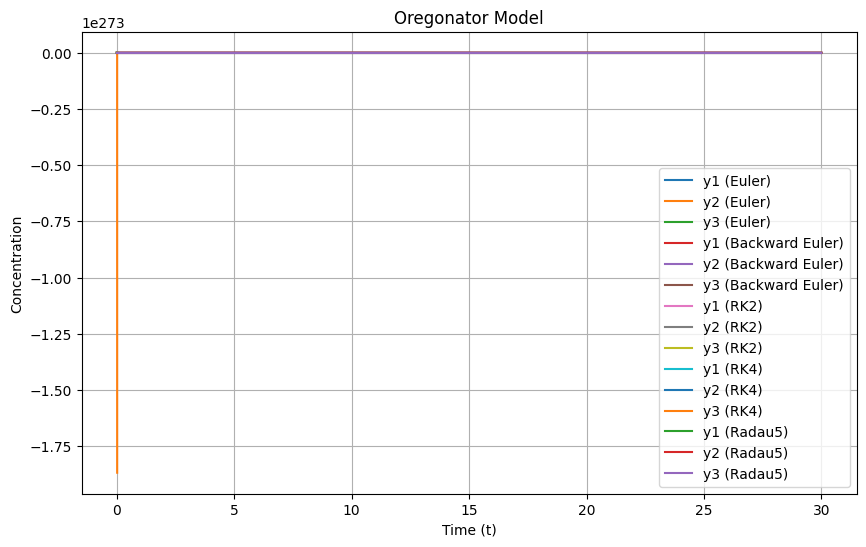

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

# The Oregonator
def oregonator(t, y, epsilon=1e-2, mu=1e-5, f=1, q=2e-4):
    y1, y2, y3 = y
    dy1_dt = (f - y1 - y1*y3 + y2) / epsilon
    dy2_dt = y1 - y2 - y1*y2
    dy3_dt = mu * (y2 - y3)
    return np.array([dy1_dt, dy2_dt, dy3_dt])

# Euler Explicit method
def euler_explicit(f, t0, y0, h, t_end):
    t_values = np.arange(t0, t_end + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0

    for i in range(1, len(t_values)):
        y_values[i] = y_values[i-1] + h * f(t_values[i-1], y_values[i-1])

    return t_values, y_values

# Backward Euler method
def backward_euler(f, t0, y0, h, t_end):
    t_values = np.arange(t0, t_end + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0

    for i in range(1, len(t_values)):
        t = t_values[i]
        def F(y_next):
            return y_next - y_values[i-1] - h * f(t, y_next)
        y_values[i] = fsolve(F, y_values[i-1])

    return t_values, y_values

# Runge-Kutta 2nd Order method
def runge_kutta_2(f, t0, y0, h, t_end):
    t_values = np.arange(t0, t_end + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0

    for i in range(1, len(t_values)):
        t = t_values[i-1]
        y = y_values[i-1]
        k1 = f(t, y)
        k2 = f(t + h, y + h * k1)
        y_values[i] = y + (h / 2) * (k1 + k2)

    return t_values, y_values

# Runge-Kutta 4th Order method
def runge_kutta_4(f, t0, y0, h, t_end):
    t_values = np.arange(t0, t_end + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0

    for i in range(1, len(t_values)):
        t = t_values[i-1]
        y = y_values[i-1]
        k1 = f(t, y)
        k2 = f(t + h/2, y + (h/2)*k1)
        k3 = f(t + h/2, y + (h/2)*k2)
        k4 = f(t + h, y + h*k3)
        y_values[i] = y + (h/6) * (k1 + 2*k2 + 2*k3 + k4)

    return t_values, y_values

# Simulation parameters
t0 = 0
t_end = 30
y0 = np.array([0.5, 0, 1200])
h = 0.001

# Solve using different methods
t_euler, y_euler = euler_explicit(oregonator, t0, y0, h, t_end)
t_beuler, y_beuler = backward_euler(oregonator, t0, y0, h, t_end)
t_rk2, y_rk2 = runge_kutta_2(oregonator, t0, y0, h, t_end)
t_rk4, y_rk4 = runge_kutta_4(oregonator, t0, y0, h, t_end)

# Solve using Radau5 with SciPy (with stiffness control)
t_span = (t0, t_end)
t_eval = np.linspace(t0, t_end, 1000)
sol_radau = solve_ivp(oregonator, t_span, y0, method='Radau', t_eval=t_eval, atol=1e-6, rtol=1e-6)
t_radau = sol_radau.t
y_radau = sol_radau.y

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t_euler, y_euler[:, 0], label="y1 (Euler)")
plt.plot(t_euler, y_euler[:, 1], label="y2 (Euler)")
plt.plot(t_euler, y_euler[:, 2], label="y3 (Euler)")

plt.plot(t_beuler, y_beuler[:, 0], label="y1 (Backward Euler)")
plt.plot(t_beuler, y_beuler[:, 1], label="y2 (Backward Euler)")
plt.plot(t_beuler, y_beuler[:, 2], label="y3 (Backward Euler)")

plt.plot(t_rk2, y_rk2[:, 0], label="y1 (RK2)")
plt.plot(t_rk2, y_rk2[:, 1], label="y2 (RK2)")
plt.plot(t_rk2, y_rk2[:, 2], label="y3 (RK2)")

plt.plot(t_rk4, y_rk4[:, 0], label="y1 (RK4)")
plt.plot(t_rk4, y_rk4[:, 1], label="y2 (RK4)")
plt.plot(t_rk4, y_rk4[:, 2], label="y3 (RK4)")

plt.plot(t_radau, y_radau[0, :], label="y1 (Radau5)")
plt.plot(t_radau, y_radau[1, :], label="y2 (Radau5)")
plt.plot(t_radau, y_radau[2, :], label="y3 (Radau5)")

plt.xlabel("Time (t)")
plt.ylabel("Concentration")
plt.title("Oregonator Model")
plt.legend()
plt.grid(True)
plt.show()

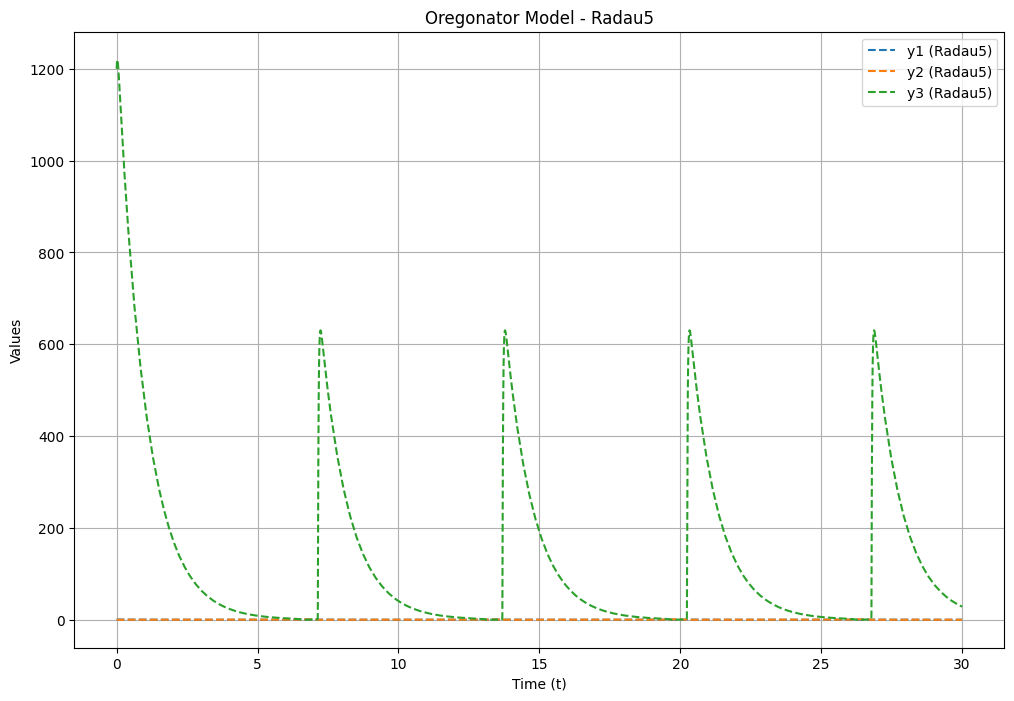

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the Oregonator model
def oregonator(t, y, eps=1e-2, mu=1e-5, f=1, q=2e-4):
    y1, y2, y3 = y
    dy1_dt = y2 - y1
    dy2_dt = (q * y3 - y3 * y2 + y2 * (1 - y2)) / eps
    dy3_dt = (-q * y3 - y3 * y2 + f * y1) / mu
    return np.array([dy1_dt, dy2_dt, dy3_dt])

# Initial conditions
t0, t_end = 0, 30
y0 = np.array([0.5, 0, 1200])
tol = 1e-5

# Solve using Radau5
solution_radau = solve_ivp(oregonator, [t0, t_end], y0, method="Radau", atol=tol, rtol=tol)

# Plot results
plt.figure(figsize=(12, 8))
plt.plot(solution_radau.t, solution_radau.y[0], label="y1 (Radau5)", linestyle='--')
plt.plot(solution_radau.t, solution_radau.y[1], label="y2 (Radau5)", linestyle='--')
plt.plot(solution_radau.t, solution_radau.y[2], label="y3 (Radau5)", linestyle='--')
plt.xlabel("Time (t)")
plt.ylabel("Values")
plt.title("Oregonator Model - Radau5 ")
plt.legend()
plt.grid()
plt.show()

<ipython-input-19-aa4888b23fd5>:8: RuntimeWarning: overflow encountered in scalar multiply
  dy2_dt = (q * y3 - y3 * y2 + y2 * (1 - y2)) / eps
<ipython-input-19-aa4888b23fd5>:9: RuntimeWarning: overflow encountered in scalar multiply
  dy3_dt = (-q * y3 - y3 * y2 + f * y1) / mu
<ipython-input-19-aa4888b23fd5>:9: RuntimeWarning: invalid value encountered in scalar subtract
  dy3_dt = (-q * y3 - y3 * y2 + f * y1) / mu
<ipython-input-19-aa4888b23fd5>:7: RuntimeWarning: invalid value encountered in scalar subtract
  dy1_dt = y2 - y1


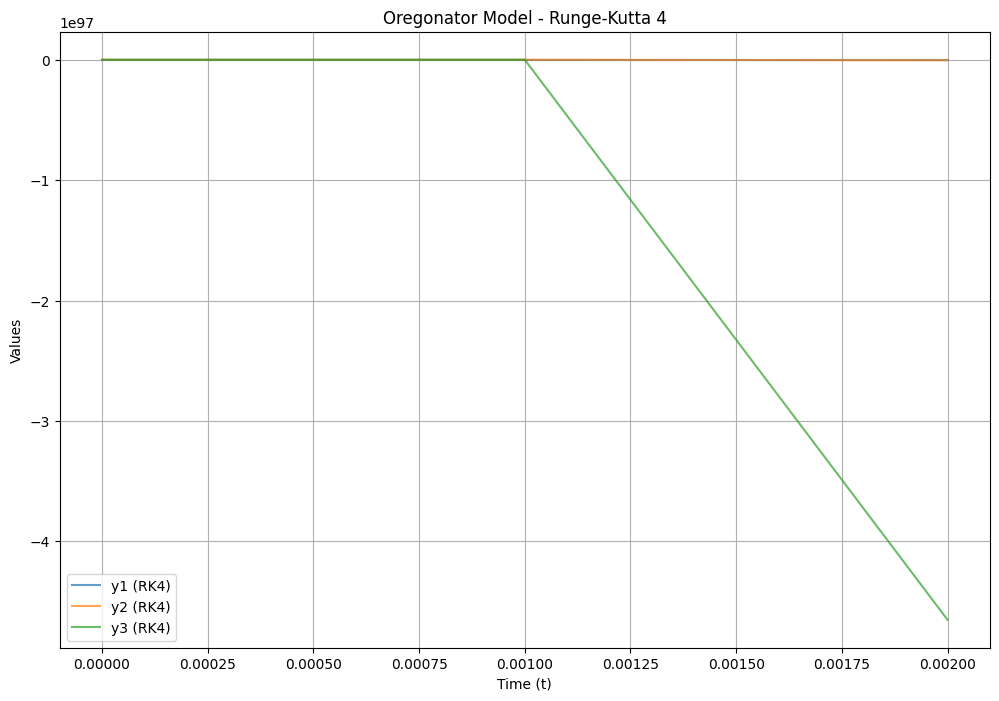

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# The Oregonator model
def oregonator(t, y, eps=1e-2, mu=1e-5, f=1, q=2e-4):
    y1, y2, y3 = y
    dy1_dt = y2 - y1
    dy2_dt = (q * y3 - y3 * y2 + y2 * (1 - y2)) / eps
    dy3_dt = (-q * y3 - y3 * y2 + f * y1) / mu
    return np.array([dy1_dt, dy2_dt, dy3_dt])

# Fourth-order Runge-Kutta method
def runge_kutta_4(f, t0, y0, t_end, h):
    t_values = np.arange(t0, t_end + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0
    for i in range(1, len(t_values)):
        t = t_values[i - 1]
        y = y_values[i - 1]
        k1 = f(t, y)
        k2 = f(t + h / 2, y + h / 2 * k1)
        k3 = f(t + h / 2, y + h / 2 * k2)
        k4 = f(t + h, y + h * k3)
        y_values[i] = y + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
    return t_values, y_values

# Initial conditions
t0, t_end = 0,30
y0 = np.array([0.5, 0, 1200])
h_rk4 = 1e-3

# Solve the system
t_rk4, y_rk4 = runge_kutta_4(oregonator, t0, y0, t_end, h_rk4)

# Plot results
plt.figure(figsize=(12, 8))
plt.plot(t_rk4, y_rk4[:, 0], label="y1 (RK4)", alpha=0.7)
plt.plot(t_rk4, y_rk4[:, 1], label="y2 (RK4)", alpha=0.7)
plt.plot(t_rk4, y_rk4[:, 2], label="y3 (RK4)", alpha=0.7)
plt.xlabel("Time (t)")
plt.ylabel("Values")
plt.title(f"Oregonator Model - Runge-Kutta 4")
plt.legend()
plt.grid()
plt.show()

<ipython-input-24-8ec7009fa9a3>:8: RuntimeWarning: overflow encountered in scalar multiply
  dy2_dt = (q * y3 - y3 * y2 + y2 * (1 - y2)) / eps
<ipython-input-24-8ec7009fa9a3>:9: RuntimeWarning: overflow encountered in scalar multiply
  dy3_dt = (-q * y3 - y3 * y2 + f * y1) / mu
<ipython-input-24-8ec7009fa9a3>:9: RuntimeWarning: invalid value encountered in scalar subtract
  dy3_dt = (-q * y3 - y3 * y2 + f * y1) / mu
<ipython-input-24-8ec7009fa9a3>:7: RuntimeWarning: invalid value encountered in scalar subtract
  dy1_dt = y2 - y1


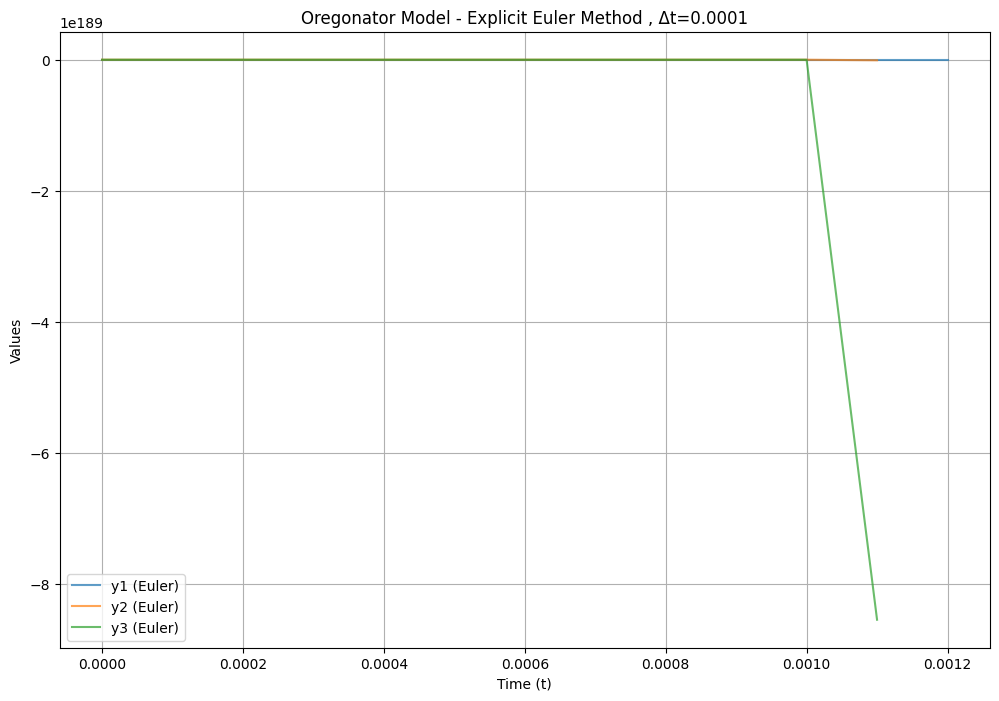

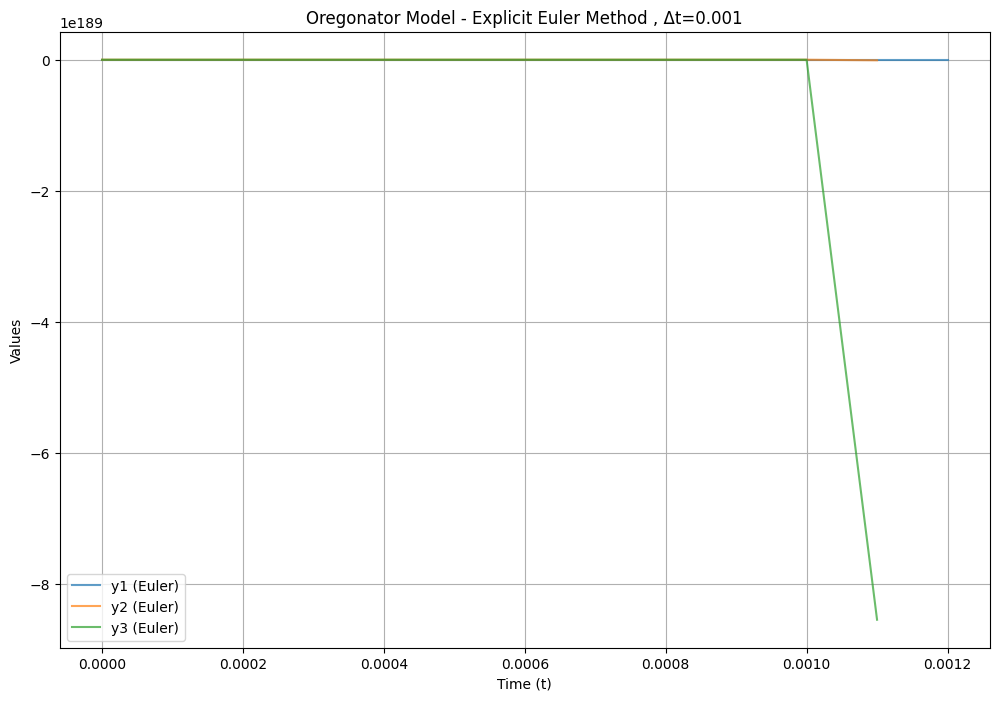

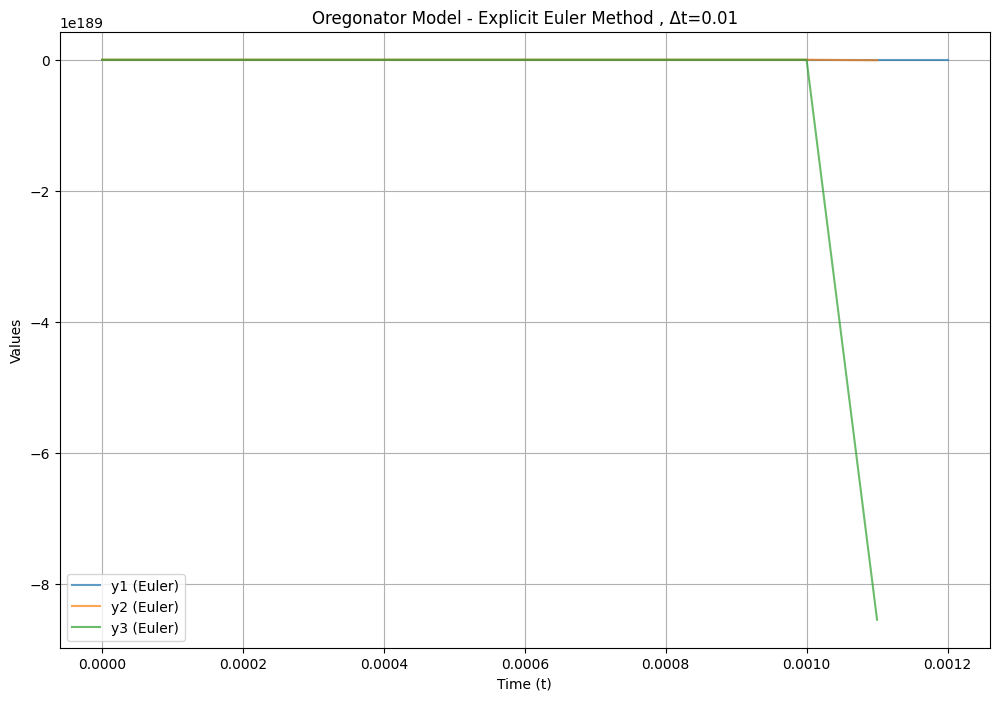

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# The Oregonator model
def oregonator(t, y, eps=1e-2, mu=1e-5, f=1, q=2e-4):
    y1, y2, y3 = y
    dy1_dt = y2 - y1
    dy2_dt = (q * y3 - y3 * y2 + y2 * (1 - y2)) / eps
    dy3_dt = (-q * y3 - y3 * y2 + f * y1) / mu
    return np.array([dy1_dt, dy2_dt, dy3_dt])

# Explicit Euler method
def explicit_euler(f, t0, y0, t_end, h):
    t_values = np.arange(t0, t_end + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0
    for i in range(1, len(t_values)):
        y_values[i] = y_values[i - 1] + h * f(t_values[i - 1], y_values[i - 1])
    return t_values, y_values

# Initial conditions
t0, t_end = 0, 30
y0 = np.array([0.5, 0, 1200])
for h in [1e-4, 1e-3, 1e-2]:
    t_euler, y_euler = explicit_euler(oregonator, t0, y0, t_end, h_euler)
    # Plot results
    plt.figure(figsize=(12, 8))
    plt.plot(t_euler, y_euler[:, 0], label="y1 (Euler)", alpha=0.7)
    plt.plot(t_euler, y_euler[:, 1], label="y2 (Euler)", alpha=0.7)
    plt.plot(t_euler, y_euler[:, 2], label="y3 (Euler)", alpha=0.7)
    plt.xlabel("Time (t)")
    plt.ylabel("Values")
    plt.title(f"Oregonator Model - Explicit Euler Method , Δt={h}")
    plt.legend()
    plt.grid()
    plt.show()

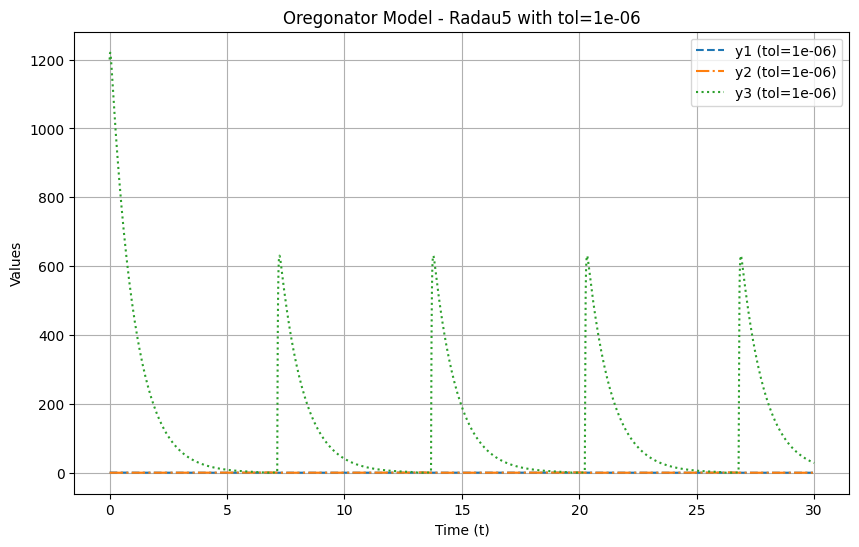

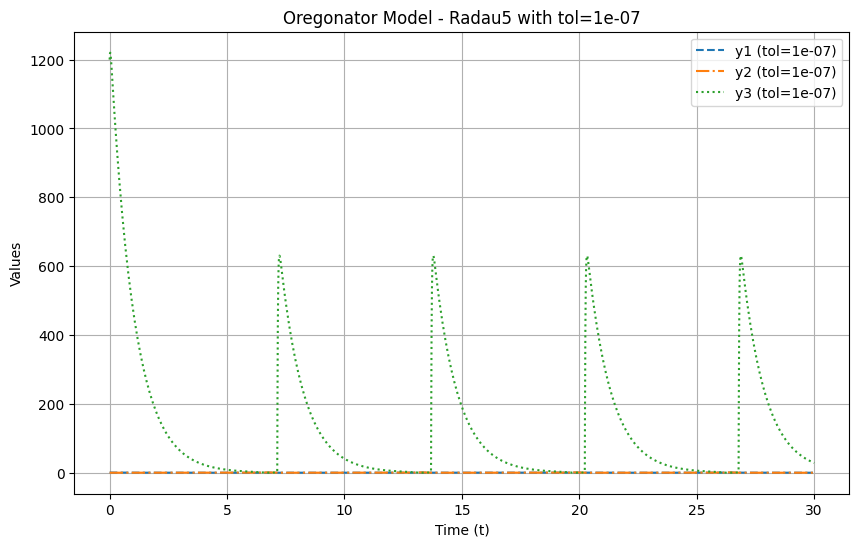

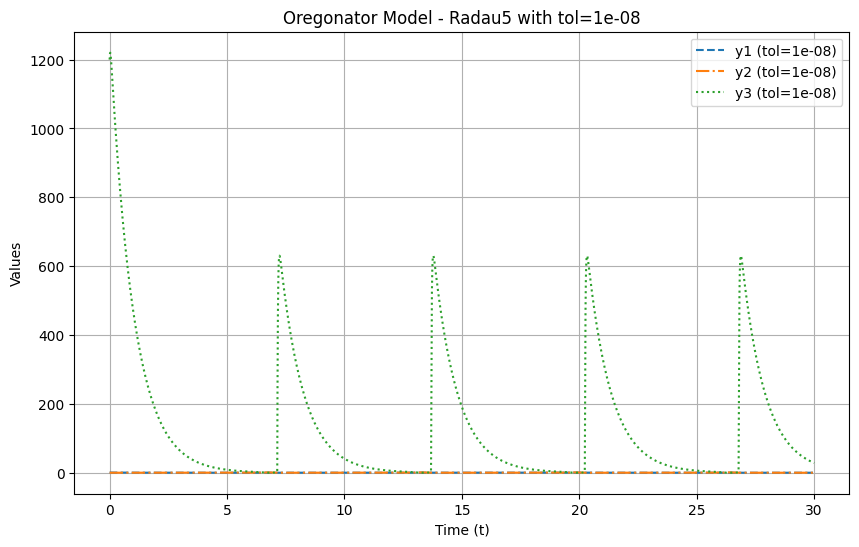

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# The Oregonator system
def oregonator(t, y, eps=1e-2, mu=1e-5, f=1, q=2e-4):
    y1, y2, y3 = y
    dy1_dt = y2 - y1
    dy2_dt = (q * y3 - y3 * y2 + y2 * (1 - y2)) / eps
    dy3_dt = (-q * y3 - y3 * y2 + f * y1) / mu
    return np.array([dy1_dt, dy2_dt, dy3_dt])

# Initial conditions and parameters
t0, t_end = 0, 30
y0 = np.array([0.5, 0, 1200])

# Solve the system using Radau with adjusted tolerances
for tol in [1e-6, 1e-7, 1e-8]:
    solution_radau = solve_ivp(oregonator, [t0, t_end], y0, method="Radau", atol=tol, rtol=tol)

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(solution_radau.t, solution_radau.y[0], label=f"y1 (tol={tol})", linestyle='--')
    plt.plot(solution_radau.t, solution_radau.y[1], label=f"y2 (tol={tol})", linestyle='-.')
    plt.plot(solution_radau.t, solution_radau.y[2], label=f"y3 (tol={tol})", linestyle=':')
    plt.xlabel("Time (t)")
    plt.ylabel("Values")
    plt.title(f"Oregonator Model - Radau5 with tol={tol}")
    plt.legend()
    plt.grid()
    plt.show()




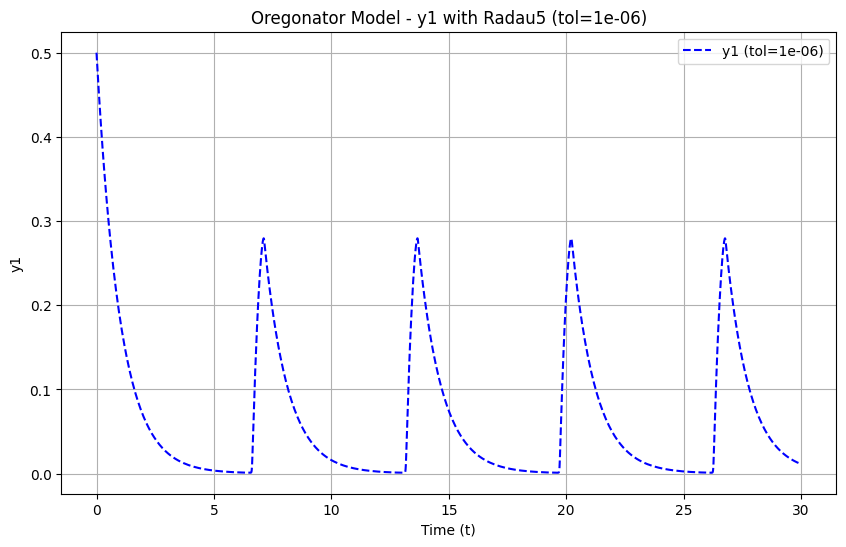

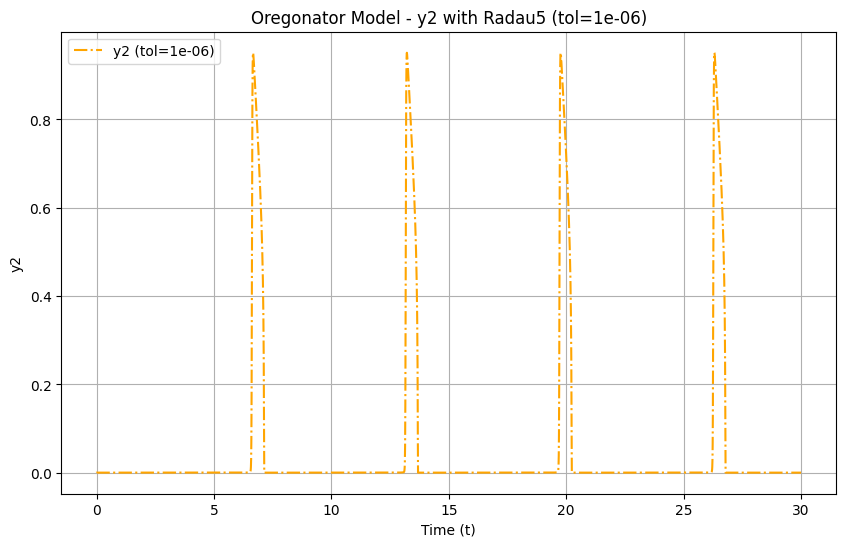

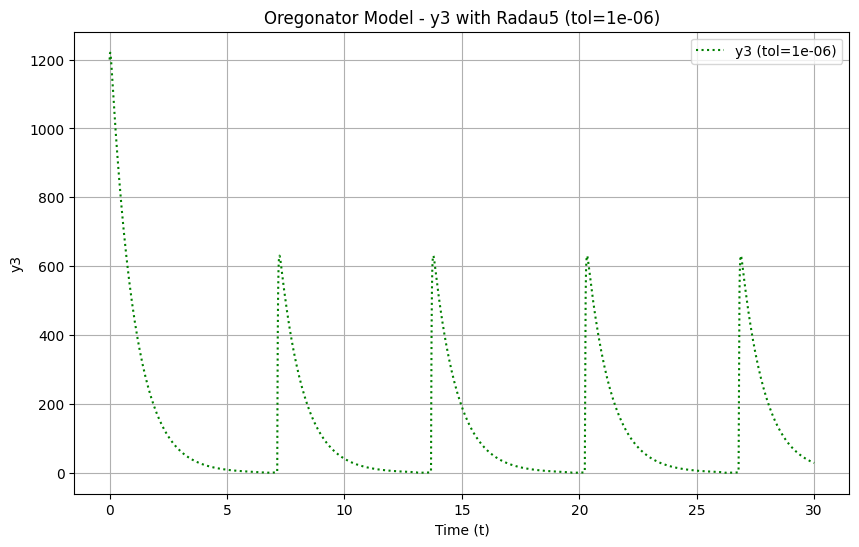

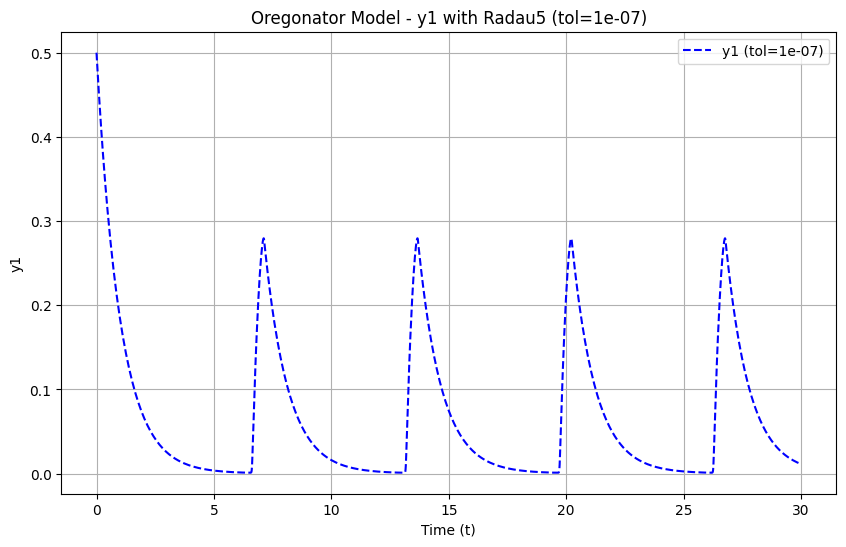

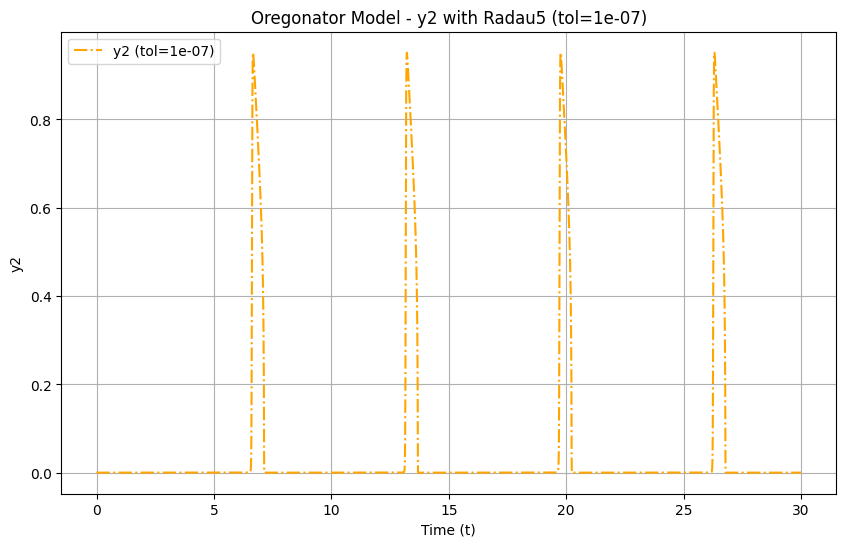

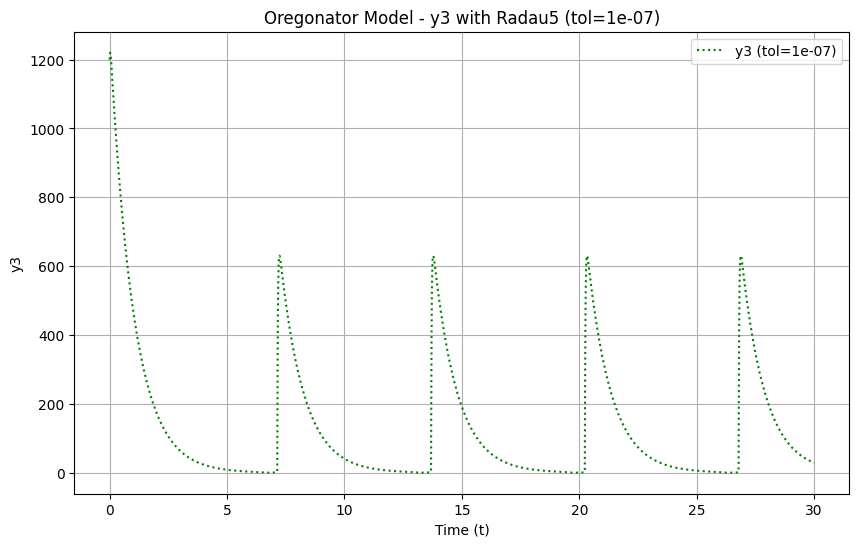

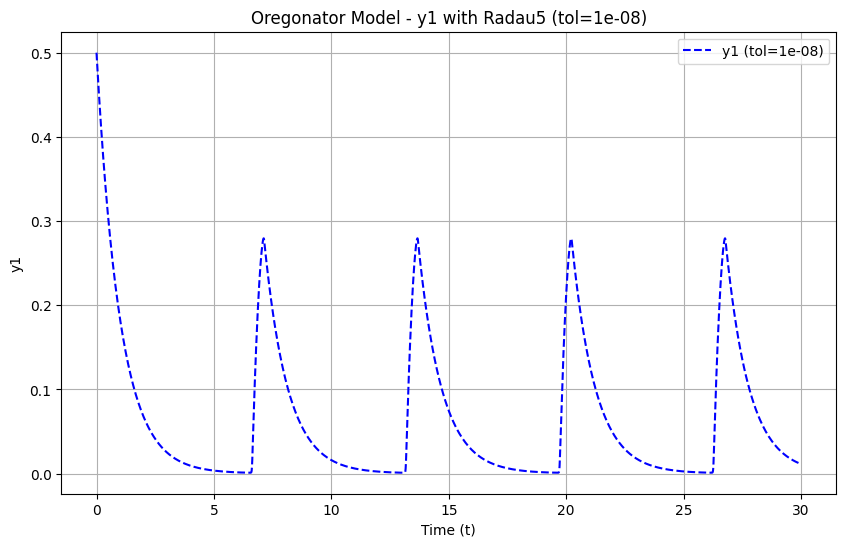

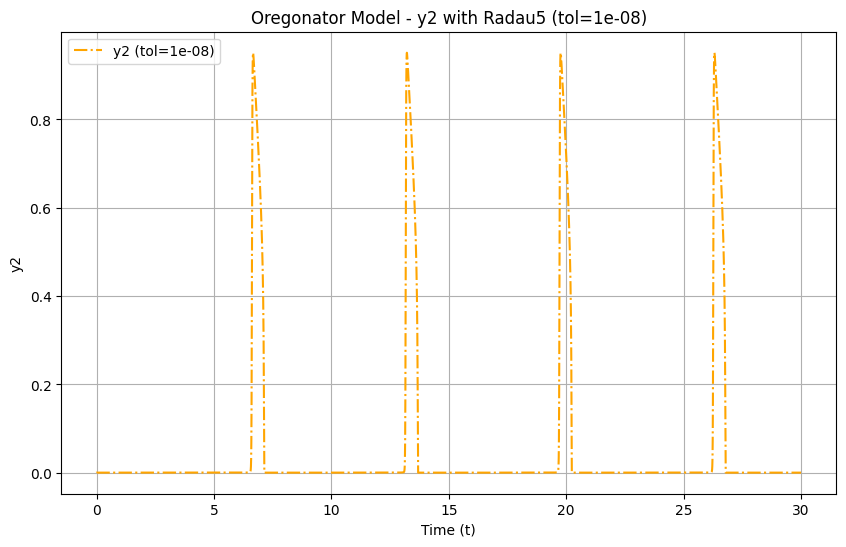

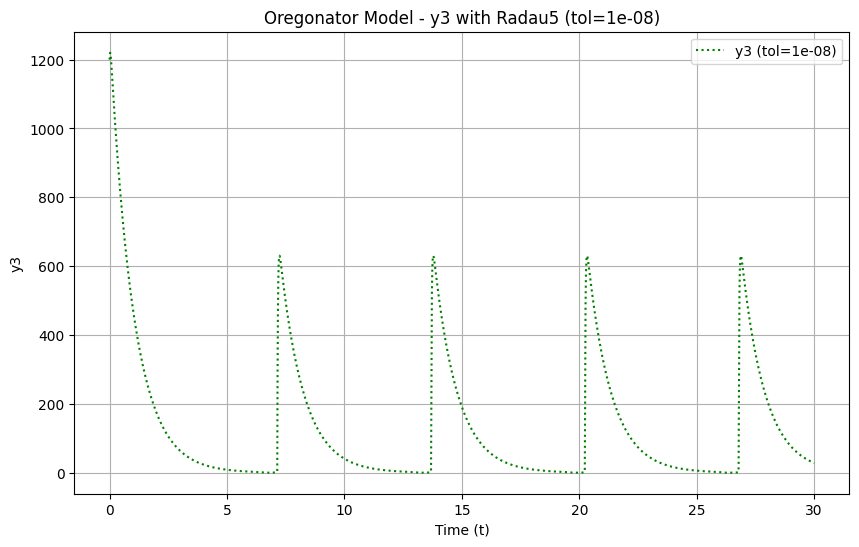

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# The Oregonator system
def oregonator(t, y, eps=1e-2, mu=1e-5, f=1, q=2e-4):
    y1, y2, y3 = y
    dy1_dt = y2 - y1
    dy2_dt = (q * y3 - y3 * y2 + y2 * (1 - y2)) / eps
    dy3_dt = (-q * y3 - y3 * y2 + f * y1) / mu
    return np.array([dy1_dt, dy2_dt, dy3_dt])

# Initial conditions and parameters
t0, t_end = 0, 30
y0 = np.array([0.5, 0, 1200])

# Solve the system using Radau with adjusted tolerances and plot individual variables
for tol in [1e-6, 1e-7, 1e-8]:
    solution_radau = solve_ivp(oregonator, [t0, t_end], y0, method="Radau", atol=tol, rtol=tol)

    # Plot y1
    plt.figure(figsize=(10, 6))
    plt.plot(solution_radau.t, solution_radau.y[0], label=f"y1 (tol={tol})", linestyle='--', color='blue')
    plt.xlabel("Time (t)")
    plt.ylabel("y1")
    plt.title(f"Oregonator Model - y1 with Radau5 (tol={tol})")
    plt.legend()
    plt.grid()
    plt.show()

    # Plot y2
    plt.figure(figsize=(10, 6))
    plt.plot(solution_radau.t, solution_radau.y[1], label=f"y2 (tol={tol})", linestyle='-.', color='orange')
    plt.xlabel("Time (t)")
    plt.ylabel("y2")
    plt.title(f"Oregonator Model - y2 with Radau5 (tol={tol})")
    plt.legend()
    plt.grid()
    plt.show()

    # Plot y3
    plt.figure(figsize=(10, 6))
    plt.plot(solution_radau.t, solution_radau.y[2], label=f"y3 (tol={tol})", linestyle=':', color='green')
    plt.xlabel("Time (t)")
    plt.ylabel("y3")
    plt.title(f"Oregonator Model - y3 with Radau5 (tol={tol})")
    plt.legend()
    plt.grid()
    plt.show()